<a href="https://colab.research.google.com/github/JoyJiang97/NRC_vote_data/blob/main/7regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [472]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [473]:
print("hello")


hello


In [474]:
import pandas as pd
import numpy as np

from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [475]:
!pip install openpyxl

In [476]:
# Define the file path (must match exactly where you saved it)
input_path = '/content/drive/Shareddrives/Nuclear/Projects/2025/NRC Commission vote efficiency/data/merged_with_allterm.csv'

# Load the data
merged_cleaned = pd.read_csv(input_path)


In [477]:
row = merged_cleaned[merged_cleaned['SECY_number'] == 'SECY-21-0088']
display(row)

,SECY_number,SRM Description,SRM Date,SRM Year,SRM url,Description,SECY Date,SECY Year,SECY url,detailed_type,_merge,title,voter,Vote Date,CVR Year,valid_vote_date,_merge_CVR,availability,SRM_Business_Days,Vote_Business_Days,Vote_SRM_Business_Days,first_vote,last_vote,Role at CVR,Party Affiliation,Start Date,End Date,Gender,Chair at CVR,Cumulative Days Served,Term Number,Chair at SECY,Chair at SECY Start Date,Chair at SECY End Date,Last Name,Date,matched,Role at SECY,SECY_before_term,Original_Vote_Business_Days,Original_SRM_Business_Days,next_chair,bdays_before_chair_end,responsible_chair
3180,SECY-21-0088,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2025-06-18,2021,https://www.nrc.gov/docs/ML2516/ML25164A112.html,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2021-10-14,2021,https://www.nrc.gov/docs/ML2030/ML20304A000.html,Other,SECY and SRM,Cmr.,CAPUTO,2024-04-23,2021,True,both,all,715.0,426.0,289.0,True,False,Commissioner,Republican,2022-08-09,2025-08-01,Female,Hanson,1753,2,Hanson,2021-01-20,2025-01-19,NaN,NaN,NaN,NaN,True,630.0,919.0,Wright,852.0,Hanson
3181,SECY-21-0088,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2025-06-18,2021,https://www.nrc.gov/docs/ML2516/ML25164A112.html,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2021-10-14,2021,https://www.nrc.gov/docs/ML2030/ML20304A000.html,Other,SECY and SRM,Cmr.,CROWELL,2025-04-10,2021,True,both,all,702.0,654.0,48.0,False,False,Commissioner,Democrat,2022-08-26,2027-06-30,Male,Wright,959,1,Hanson,2021-01-20,2025-01-19,NaN,NaN,NaN,NaN,True,871.0,919.0,Wright,852.0,Hanson
3182,SECY-21-0088,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2025-06-18,2021,https://www.nrc.gov/docs/ML2516/ML25164A112.html,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2021-10-14,2021,https://www.nrc.gov/docs/ML2030/ML20304A000.html,Other,SECY and SRM,Cmr.,MARZANO,2025-05-30,2021,True,both,all,112.0,99.0,13.0,False,True,Commissioner,Democrat,2025-01-08,2028-06-30,Male,Wright,143,1,Hanson,2021-01-20,2025-01-19,NaN,NaN,NaN,NaN,True,906.0,919.0,Wright,852.0,Hanson
3183,SECY-21-0088,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2025-06-18,2021,https://www.nrc.gov/docs/ML2516/ML25164A112.html,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2021-10-14,2021,https://www.nrc.gov/docs/ML2030/ML20304A000.html,Other,SECY and SRM,Chair,WRIGHT,2025-05-30,2021,True,both,all,919.0,906.0,13.0,False,False,Chair,Republican,2025-01-20,2025-06-30,Male,Wright,2558,2,Hanson,2021-01-20,2025-01-19,WRIGHT,2021-10-14,True,Commissioner,True,906.0,919.0,Wright,852.0,Hanson


In [478]:
merged_cleaned.head()

,SECY_number,SRM Description,SRM Date,SRM Year,SRM url,Description,SECY Date,SECY Year,SECY url,detailed_type,_merge,title,voter,Vote Date,CVR Year,valid_vote_date,_merge_CVR,availability,SRM_Business_Days,Vote_Business_Days,Vote_SRM_Business_Days,first_vote,last_vote,Role at CVR,Party Affiliation,Start Date,End Date,Gender,Chair at CVR,Cumulative Days Served,Term Number,Chair at SECY,Chair at SECY Start Date,Chair at SECY End Date,Last Name,Date,matched,Role at SECY,SECY_before_term,Original_Vote_Business_Days,Original_SRM_Business_Days,next_chair,bdays_before_chair_end,responsible_chair
0,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,DIAZ,2000-02-08,2000,True,both,all,29.0,25.0,4.0,False,True,Commissioner,Republican,1996-08-23,2001-06-30,Male,Meserve,1265,1,Meserve,1999-10-29,2003-03-31,DIAZ,2000-01-03,True,Commissioner,False,25.0,29.0,Diaz,845.0,Meserve
1,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,DICUS,2000-01-13,2000,True,both,all,29.0,8.0,21.0,False,False,Commissioner,Democrat,1999-10-29,2003-06-30,Female,Meserve,1311,4,Meserve,1999-10-29,2003-03-31,DICUS,2000-01-03,True,Commissioner,False,8.0,29.0,Diaz,845.0,Meserve
2,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,MCGAFFIGAN,2000-01-21,2000,True,both,all,29.0,13.0,16.0,False,False,Commissioner,Democrat,1996-08-28,2005-06-30,Male,Meserve,1242,1,Meserve,1999-10-29,2003-03-31,MCGAFFIGAN,2000-01-03,True,Commissioner,False,13.0,29.0,Diaz,845.0,Meserve
3,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,MERRIFIELD,2000-01-11,2000,True,both,all,29.0,6.0,23.0,True,False,Commissioner,Republican,1998-10-23,2002-06-30,Male,Meserve,446,1,Meserve,1999-10-29,2003-03-31,MERRIFIELD,2000-01-03,True,Commissioner,False,6.0,29.0,Diaz,845.0,Meserve
4,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,CHRM.,MESERVE,2000-01-19,2000,True,both,all,29.0,11.0,18.0,False,False,Chair,Democrat,1999-10-29,2003-03-31,Male,Meserve,83,1,Meserve,1999-10-29,2003-03-31,MESERVE,2000-01-03,True,Chair,False,11.0,29.0,Diaz,845.0,Meserve


In [479]:
# Display all unique voter names
unique_voters = merged_cleaned['voter'].dropna().unique()
unique_voters.sort()
unique_voters

array(['APOSTOLAKIS', 'BARAN', 'BURNS', 'CAPUTO', 'CROWELL', 'DIAZ',
       'DICUS', 'HANSON', 'JACKSON', 'JACZKO', 'KLEIN', 'LYONS',
       'MACFARLANE', 'MAGWOOD', 'MARZANO', 'MCGAFFIGAN', 'MERRIFIELD',
       'MESERVE', 'OSTENDORFF', 'SVINICKI', 'WRIGHT'], dtype=object)

## commissioner count analysis

In [480]:
# Load the specified Excel file from the user's Google Drive path
file_path = "/content/drive/Shareddrives/Nuclear/Projects/2025/NRC Commission vote efficiency/data/NRC_timeline.xlsx"
nrc_timeline_data = pd.read_excel(file_path)

In [481]:
nrc_timeline_data

,date,commissioner_count
0,1975-01-19,5
1,1975-01-20,5
2,1975-01-21,5
3,1975-01-22,5
4,1975-01-23,5
...,...,...
20247,2030-06-26,1
20248,2030-06-27,1
20249,2030-06-28,1
20250,2030-06-29,1


In [482]:
# Ensure all date columns are in datetime format
date_cols = ['SECY Date', 'Vote Date', 'SRM Date']
for col in date_cols:
    merged_cleaned[col] = pd.to_datetime(merged_cleaned[col], errors='coerce')


In [483]:
## merge with SECY Date

# Ensure proper datetime format for merging
nrc_timeline_data['date'] = pd.to_datetime(nrc_timeline_data['date'])
merged_cleaned['SECY Date'] = pd.to_datetime(merged_cleaned['SECY Date'])

# Merge using SECY Date to align with NRC timeline
merged_with_timeline = merged_cleaned.merge(
    nrc_timeline_data,
    left_on='SECY Date',
    right_on='date',
    how='left'
)

# Optional: Drop the extra 'date' column from timeline if not needed
merged_with_timeline = merged_with_timeline.drop(columns=['date'])

# Rename column
merged_with_timeline = merged_with_timeline.rename(columns={'commissioner_count': 'com_count_SECY'})

# Merge using SECY Date to align with NRC timeline
merged_with_timeline = merged_with_timeline.merge(
    nrc_timeline_data,
    left_on='Vote Date',
    right_on='date',
    how='left'
)

# Optional: Drop the extra 'date' column from timeline if not needed
merged_with_timeline = merged_with_timeline.drop(columns=['date'])

# Rename column
merged_with_timeline = merged_with_timeline.rename(columns={'commissioner_count': 'com_count_CVR'})


# Merge using SECY Date to align with NRC timeline
merged_with_timeline = merged_with_timeline.merge(
    nrc_timeline_data,
    left_on='SRM Date',
    right_on='date',
    how='left'
)

# Optional: Drop the extra 'date' column from timeline if not needed
merged_with_timeline = merged_with_timeline.drop(columns=['date'])

# Rename column
merged_with_timeline = merged_with_timeline.rename(columns={'commissioner_count': 'com_count_SRM'})

In [484]:
merged_cleaned['SECY_number'].nunique()

1048

In [485]:

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)          # helps prevent wrapping
pd.set_option('display.max_colwidth', None)   # show full text in cells

row = merged_with_timeline[merged_with_timeline['SECY_number'] == 'SECY-21-0088']
display(row)

,SECY_number,SRM Description,SRM Date,SRM Year,SRM url,Description,SECY Date,SECY Year,SECY url,detailed_type,_merge,title,voter,Vote Date,CVR Year,valid_vote_date,_merge_CVR,availability,SRM_Business_Days,Vote_Business_Days,Vote_SRM_Business_Days,first_vote,last_vote,Role at CVR,Party Affiliation,Start Date,End Date,Gender,Chair at CVR,Cumulative Days Served,Term Number,Chair at SECY,Chair at SECY Start Date,Chair at SECY End Date,Last Name,Date,matched,Role at SECY,SECY_before_term,Original_Vote_Business_Days,Original_SRM_Business_Days,next_chair,bdays_before_chair_end,responsible_chair,com_count_SECY,com_count_CVR,com_count_SRM
3180,SECY-21-0088,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2025-06-18,2021,https://www.nrc.gov/docs/ML2516/ML25164A112.html,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2021-10-14,2021,https://www.nrc.gov/docs/ML2030/ML20304A000.html,Other,SECY and SRM,Cmr.,CAPUTO,2024-04-23,2021,True,both,all,715.0,426.0,289.0,True,False,Commissioner,Republican,2022-08-09,2025-08-01,Female,Hanson,1753,2,Hanson,2021-01-20,2025-01-19,NaN,NaN,NaN,NaN,True,630.0,919.0,Wright,852.0,Hanson,3,4,4
3181,SECY-21-0088,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2025-06-18,2021,https://www.nrc.gov/docs/ML2516/ML25164A112.html,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2021-10-14,2021,https://www.nrc.gov/docs/ML2030/ML20304A000.html,Other,SECY and SRM,Cmr.,CROWELL,2025-04-10,2021,True,both,all,702.0,654.0,48.0,False,False,Commissioner,Democrat,2022-08-26,2027-06-30,Male,Wright,959,1,Hanson,2021-01-20,2025-01-19,NaN,NaN,NaN,NaN,True,871.0,919.0,Wright,852.0,Hanson,3,5,4
3182,SECY-21-0088,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2025-06-18,2021,https://www.nrc.gov/docs/ML2516/ML25164A112.html,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2021-10-14,2021,https://www.nrc.gov/docs/ML2030/ML20304A000.html,Other,SECY and SRM,Cmr.,MARZANO,2025-05-30,2021,True,both,all,112.0,99.0,13.0,False,True,Commissioner,Democrat,2025-01-08,2028-06-30,Male,Wright,143,1,Hanson,2021-01-20,2025-01-19,NaN,NaN,NaN,NaN,True,906.0,919.0,Wright,852.0,Hanson,3,5,4
3183,SECY-21-0088,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2025-06-18,2021,https://www.nrc.gov/docs/ML2516/ML25164A112.html,Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180),2021-10-14,2021,https://www.nrc.gov/docs/ML2030/ML20304A000.html,Other,SECY and SRM,Chair,WRIGHT,2025-05-30,2021,True,both,all,919.0,906.0,13.0,False,False,Chair,Republican,2025-01-20,2025-06-30,Male,Wright,2558,2,Hanson,2021-01-20,2025-01-19,WRIGHT,2021-10-14,True,Commissioner,True,906.0,919.0,Wright,852.0,Hanson,3,5,4


In [486]:
# Create the new variable only when all three counts are equal and valid (3, 4, or 5)
merged_with_timeline['com_count_consistent'] = merged_with_timeline.apply(
    lambda row: row['com_count_SECY']
    if row['com_count_SECY'] == row.get('com_count_CVR') == row.get('com_count_SRM')
       and row['com_count_SECY'] in [3, 4, 5]
    else None,
    axis=1
)

# Create the new variable only when all three counts are equal and valid (3, 4, or 5)
merged_with_timeline['com_count_average'] = (merged_with_timeline['com_count_SECY']+merged_with_timeline['com_count_CVR'])/2

# Preview the result
merged_with_timeline.head()


,SECY_number,SRM Description,SRM Date,SRM Year,SRM url,Description,SECY Date,SECY Year,SECY url,detailed_type,_merge,title,voter,Vote Date,CVR Year,valid_vote_date,_merge_CVR,availability,SRM_Business_Days,Vote_Business_Days,Vote_SRM_Business_Days,first_vote,last_vote,Role at CVR,Party Affiliation,Start Date,End Date,Gender,Chair at CVR,Cumulative Days Served,Term Number,Chair at SECY,Chair at SECY Start Date,Chair at SECY End Date,Last Name,Date,matched,Role at SECY,SECY_before_term,Original_Vote_Business_Days,Original_SRM_Business_Days,next_chair,bdays_before_chair_end,responsible_chair,com_count_SECY,com_count_CVR,com_count_SRM,com_count_consistent,com_count_average
0,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,DIAZ,2000-02-08,2000,True,both,all,29.0,25.0,4.0,False,True,Commissioner,Republican,1996-08-23,2001-06-30,Male,Meserve,1265,1,Meserve,1999-10-29,2003-03-31,DIAZ,2000-01-03,True,Commissioner,False,25.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,5.0
1,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,DICUS,2000-01-13,2000,True,both,all,29.0,8.0,21.0,False,False,Commissioner,Democrat,1999-10-29,2003-06-30,Female,Meserve,1311,4,Meserve,1999-10-29,2003-03-31,DICUS,2000-01-03,True,Commissioner,False,8.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,5.0
2,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,MCGAFFIGAN,2000-01-21,2000,True,both,all,29.0,13.0,16.0,False,False,Commissioner,Democrat,1996-08-28,2005-06-30,Male,Meserve,1242,1,Meserve,1999-10-29,2003-03-31,MCGAFFIGAN,2000-01-03,True,Commissioner,False,13.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,5.0
3,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,MERRIFIELD,2000-01-11,2000,True,both,all,29.0,6.0,23.0,True,False,Commissioner,Republican,1998-10-23,2002-06-30,Male,Meserve,446,1,Meserve,1999-10-29,2003-03-31,MERRIFIELD,2000-01-03,True,Commissioner,False,6.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,5.0
4,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,CHRM.,MESERVE,2000-01-19,2000,True,both,all,29.0,11.0,18.0,False,False,Chair,Democrat,1999-10-29,2003-03-31,Male,Meserve,83,1,Meserve,1999-10-29,2003-03-31,MESERVE,2000-01-03,True,Chair,False,11.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,5.0


In [487]:
# Display the unique values
merged_with_timeline['com_count_SECY'].value_counts(dropna=False)

,count
com_count_SECY,
5,2434
4,1316
3,680


In [488]:
# Display the unique values
merged_with_timeline['com_count_consistent'].value_counts(dropna=False)

,count
com_count_consistent,
5.0,2106
4.0,957
NaN,933
3.0,434


In [489]:
# Display the unique values
merged_with_timeline['com_count_average'].value_counts(dropna=False)

,count
com_count_average,
5.0,2208
4.0,1182
3.0,487
4.5,390
3.5,163


In [490]:
import numpy as np

# Correct version using .isin() with a list
merged_with_timeline['type'] = np.where(
    merged_with_timeline['detailed_type'].isin(['Proposed Rule', 'Final Rule']),
    merged_with_timeline['detailed_type'],
    'Other'
)


In [491]:
merged_with_timeline['type'].value_counts()

,count
type,
Other,3435
Proposed Rule,509
Final Rule,486


In [492]:
import numpy as np

# Assuming your DataFrame is called df and the column is 'com_count_consistent'
merged_with_timeline['consistency_count'] = np.where(merged_with_timeline['com_count_consistent'].isna(), 0, 1)


In [493]:
merged_with_timeline = merged_with_timeline[merged_with_timeline['availability'] == 'all']


In [494]:
missing_secy = merged_with_timeline['SECY_number'].isna().sum()
print(f"Number of SECYs with missing SECY_number: {missing_secy}")

Number of SECYs with missing SECY_number: 0


##congress data

In [495]:
# Load the specified Excel file from the user's Google Drive path
file_path = "/content/drive/Shareddrives/Nuclear/Projects/2025/NRC Commission vote efficiency/data/political_data.xlsx"
political_data = pd.read_excel(file_path)

In [496]:
# Convert 'Date' column to datetime safely
political_data['Date'] = pd.to_datetime(political_data['Date'], errors='coerce')

In [497]:
political_data.head()

,Date,Congress,Presidency
0,1997-01-01,1.0,0
1,1997-01-02,1.0,0
2,1997-01-03,1.0,0
3,1997-01-04,1.0,0
4,1997-01-05,1.0,0


In [498]:
# Merge using SECY Date to align with NRC timeline
merged_with_timeline = merged_with_timeline.merge(
    political_data,
    left_on='Vote Date',
    right_on='Date',
    how='left'
)

In [499]:
# Example assuming 'Party Affiliation' column
merged_with_timeline['Party'] = merged_with_timeline['Party Affiliation'].map({
    'Democrat': 0,
    'Republican': 1,
    'Independent':0.5
})

print(
    merged_with_timeline.loc[
        merged_with_timeline['Party'].isna(),
        ['voter', 'Chair at CVR', 'Party Affiliation', 'Party']
    ]
)

Empty DataFrame
Columns: [voter, Chair at CVR, Party Affiliation, Party]
Index: []


In [500]:
print(merged_with_timeline[merged_with_timeline['Party'].isna()]['Party Affiliation'].unique())

[]


In [501]:
# Check column names
print("Columns in merged_with_timeline:")
print(merged_with_timeline.columns.tolist())

# Optional: Check data types for more detail
print("\nData types of each column:")
print(merged_with_timeline.dtypes)


Columns in merged_with_timeline:
['SECY_number', 'SRM Description', 'SRM Date', 'SRM Year', 'SRM url', 'Description', 'SECY Date', 'SECY Year', 'SECY url', 'detailed_type', '_merge', 'title', 'voter', 'Vote Date', 'CVR Year', 'valid_vote_date', '_merge_CVR', 'availability', 'SRM_Business_Days', 'Vote_Business_Days', 'Vote_SRM_Business_Days', 'first_vote', 'last_vote', 'Role at CVR', 'Party Affiliation', 'Start Date', 'End Date', 'Gender', 'Chair at CVR', 'Cumulative Days Served', 'Term Number', 'Chair at SECY', 'Chair at SECY Start Date', 'Chair at SECY End Date', 'Last Name', 'Date_x', 'matched', 'Role at SECY', 'SECY_before_term', 'Original_Vote_Business_Days', 'Original_SRM_Business_Days', 'next_chair', 'bdays_before_chair_end', 'responsible_chair', 'com_count_SECY', 'com_count_CVR', 'com_count_SRM', 'com_count_consistent', 'com_count_average', 'type', 'consistency_count', 'Date_y', 'Congress', 'Presidency', 'Party']

Data types of each column:
SECY_number                           

In [502]:
merged_with_timeline['valid_vote_date'].describe()

,valid_vote_date
count,4430
unique,1
top,True
freq,4430


In [503]:
# Absolute difference between Party and Congress
merged_with_timeline['Party_Congress_Diff'] = (merged_with_timeline['Party'] - merged_with_timeline['Congress']).abs()

# Absolute difference between Party and Presidency
merged_with_timeline['Party_Presidency_Diff'] = (merged_with_timeline['Party'] - merged_with_timeline['Presidency']).abs()


In [504]:
merged_with_timeline['post_Ostendorff'] = merged_with_timeline['SECY Date'] >= '2016-06-30'
merged_with_timeline.head()

,SECY_number,SRM Description,SRM Date,SRM Year,SRM url,Description,SECY Date,SECY Year,SECY url,detailed_type,_merge,title,voter,Vote Date,CVR Year,valid_vote_date,_merge_CVR,availability,SRM_Business_Days,Vote_Business_Days,Vote_SRM_Business_Days,first_vote,last_vote,Role at CVR,Party Affiliation,Start Date,End Date,Gender,Chair at CVR,Cumulative Days Served,Term Number,Chair at SECY,Chair at SECY Start Date,Chair at SECY End Date,Last Name,Date_x,matched,Role at SECY,SECY_before_term,Original_Vote_Business_Days,Original_SRM_Business_Days,next_chair,bdays_before_chair_end,responsible_chair,com_count_SECY,com_count_CVR,com_count_SRM,com_count_consistent,com_count_average,type,consistency_count,Date_y,Congress,Presidency,Party,Party_Congress_Diff,Party_Presidency_Diff,post_Ostendorff
0,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,DIAZ,2000-02-08,2000,True,both,all,29.0,25.0,4.0,False,True,Commissioner,Republican,1996-08-23,2001-06-30,Male,Meserve,1265,1,Meserve,1999-10-29,2003-03-31,DIAZ,2000-01-03,True,Commissioner,False,25.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,5.0,Other,1,2000-02-08,1.0,0,1.0,0.0,1.0,False
1,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,DICUS,2000-01-13,2000,True,both,all,29.0,8.0,21.0,False,False,Commissioner,Democrat,1999-10-29,2003-06-30,Female,Meserve,1311,4,Meserve,1999-10-29,2003-03-31,DICUS,2000-01-03,True,Commissioner,False,8.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,5.0,Other,1,2000-01-13,1.0,0,0.0,1.0,0.0,False
2,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,MCGAFFIGAN,2000-01-21,2000,True,both,all,29.0,13.0,16.0,False,False,Commissioner,Democrat,1996-08-28,2005-06-30,Male,Meserve,1242,1,Meserve,1999-10-29,2003-03-31,MCGAFFIGAN,2000-01-03,True,Commissioner,False,13.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,5.0,Other,1,2000-01-21,1.0,0,0.0,1.0,0.0,False
3,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,MERRIFIELD,2000-01-11,2000,True,both,all,29.0,6.0,23.0,True,False,Commissioner,Republican,1998-10-23,2002-06-30,Male,Meserve,446,1,Meserve,1999-10-29,2003-03-31,MERRIFIELD,2000-01-03,True,Commissioner,False,6.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,5.0,Other,1,2000-01-11,1.0,0,1.0,0.0,1.0,False
4,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,CHRM.,MESERVE,2000-01-19,2000,True,both,all,29.0,11.0,1

In [505]:
print(merged_with_timeline.isna().sum())

SECY_number                      0
SRM Description                 62
SRM Date                         0
SRM Year                         0
SRM url                         62
Description                      0
SECY Date                        0
SECY Year                        0
SECY url                         0
detailed_type                    0
_merge                           0
title                            0
voter                            0
Vote Date                        0
CVR Year                         0
valid_vote_date                  0
_merge_CVR                       0
availability                     0
SRM_Business_Days                0
Vote_Business_Days               8
Vote_SRM_Business_Days           0
first_vote                       0
last_vote                        0
Role at CVR                      0
Party Affiliation                0
Start Date                       0
End Date                         0
Gender                           0
Chair at CVR        

In [506]:
merged_with_timeline["voter"] = (
  merged_with_timeline["voter"]
    .astype(str)
    .str.strip()
    .str.title()
)

In [507]:
merged_with_timeline.head()

,SECY_number,SRM Description,SRM Date,SRM Year,SRM url,Description,SECY Date,SECY Year,SECY url,detailed_type,_merge,title,voter,Vote Date,CVR Year,valid_vote_date,_merge_CVR,availability,SRM_Business_Days,Vote_Business_Days,Vote_SRM_Business_Days,first_vote,last_vote,Role at CVR,Party Affiliation,Start Date,End Date,Gender,Chair at CVR,Cumulative Days Served,Term Number,Chair at SECY,Chair at SECY Start Date,Chair at SECY End Date,Last Name,Date_x,matched,Role at SECY,SECY_before_term,Original_Vote_Business_Days,Original_SRM_Business_Days,next_chair,bdays_before_chair_end,responsible_chair,com_count_SECY,com_count_CVR,com_count_SRM,com_count_consistent,com_count_average,type,consistency_count,Date_y,Congress,Presidency,Party,Party_Congress_Diff,Party_Presidency_Diff,post_Ostendorff
0,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,Diaz,2000-02-08,2000,True,both,all,29.0,25.0,4.0,False,True,Commissioner,Republican,1996-08-23,2001-06-30,Male,Meserve,1265,1,Meserve,1999-10-29,2003-03-31,DIAZ,2000-01-03,True,Commissioner,False,25.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,5.0,Other,1,2000-02-08,1.0,0,1.0,0.0,1.0,False
1,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,Dicus,2000-01-13,2000,True,both,all,29.0,8.0,21.0,False,False,Commissioner,Democrat,1999-10-29,2003-06-30,Female,Meserve,1311,4,Meserve,1999-10-29,2003-03-31,DICUS,2000-01-03,True,Commissioner,False,8.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,5.0,Other,1,2000-01-13,1.0,0,0.0,1.0,0.0,False
2,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,Mcgaffigan,2000-01-21,2000,True,both,all,29.0,13.0,16.0,False,False,Commissioner,Democrat,1996-08-28,2005-06-30,Male,Meserve,1242,1,Meserve,1999-10-29,2003-03-31,MCGAFFIGAN,2000-01-03,True,Commissioner,False,13.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,5.0,Other,1,2000-01-21,1.0,0,0.0,1.0,0.0,False
3,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,COMR.,Merrifield,2000-01-11,2000,True,both,all,29.0,6.0,23.0,True,False,Commissioner,Republican,1998-10-23,2002-06-30,Male,Meserve,446,1,Meserve,1999-10-29,2003-03-31,MERRIFIELD,2000-01-03,True,Commissioner,False,6.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,5.0,Other,1,2000-01-11,1.0,0,1.0,0.0,1.0,False
4,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,SECY and SRM,CHRM.,Meserve,2000-01-19,2000,True,both,all,29.0,11.0,1

##Final Dataset

In [508]:
cols_to_drop = [
    "_merge",
    "_merge_CVR",
    "valid_vote_date",
    "Date_x",
    "Date_y",
    "matched",
    "availability",
    "title",
    "Last Name",
    "consistent_count",
    "type",
    "com_count_consistent",
    "same_chair",
    "date",
    "congress_recess",
    "holiday_season"
]

vote_efficiency_dataset = merged_with_timeline.drop(columns=cols_to_drop, errors="ignore")


In [509]:
# 2) Curated renames for clarity + consistent prefixes
rename_map = {
    "Description": "SECY_description",
    "SRM Description": "SRM_description",
    "SRM Date": "SRM_date",
    "SRM Year": "SRM_year",
    "SRM url": "SRM_url",
    "SECY Date": "SECY_date",
    "SECY Year": "SECY_year",
    "SECY url": "SECY_url",

    # Vote layer (CVR)
    "voter": "voter_last_name",
    "Vote Date": "CVR_date",
    "CVR Year": "CVR_year",

    # Business day metrics (standardized)
    "SRM_Business_Days": "bdays_to_SRM",
    "Vote_Business_Days": "bdays_to_CVR",
    "Vote_SRM_Business_Days": "bdays_CVR_to_SRM",
    "Original_Vote_Business_Days": "bdays_to_CVR_original",
    "Original_SRM_Business_Days": "bdays_to_SRM_original",

    # Vote ordering flags
    "first_vote": "is_first_vote",
    "last_vote": "is_last_vote",

    # Roles/chair fields
    "Role at CVR": "role_at_CVR",
    "Role at SECY": "role_at_SECY",
    "Chair at CVR": "chair_at_CVR",
    "Chair at SECY": "chair_at_SECY",
    "Chair at SECY Start Date": "chair_at_SECY_start_date",
    "Chair at SECY End Date": "chair_at_SECY_end_date",

    # Commissioner attributes
    "Party Affiliation": "voter_party",
    "Start Date": "voter_start_date",
    "End Date": "voter_end_date",
    "Gender": "voter_gender",
    "Cumulative Days Served": "voter_days_served",
    "Term Number": "voter_term_number",

    # Commissioner-count aggregates
    "com_count_SECY": "commissioner_count_SECY",
    "com_count_CVR": "commissioner_count_CVR",
    "com_count_SRM": "commissioner_count_SRM",
    "com_count_average": "commissioner_count_average",

    # Political context
    "Congress": "congress_majority",
    "Presidency": "presidency_party",
    "Party": "voter_party_code",
    "Party_Congress_Diff": "voter_congress_diff",
    "Party_Presidency_Diff": "voter_presidency_diff",
}

vote_efficiency_dataset = vote_efficiency_dataset.rename(columns={k: v for k, v in rename_map.items() if k in vote_efficiency_dataset.columns})


In [510]:
date_cols = [
    "voter_start_date", "voter_end_date",
    "chair_at_SECY_start_date", "chair_at_SECY_end_date"
]
for c in date_cols:
    vote_efficiency_dataset[c] = pd.to_datetime(vote_efficiency_dataset[c], errors="coerce")




In [511]:
vote_efficiency_dataset.shape
vote_efficiency_dataset.columns.tolist()
vote_efficiency_dataset.head(10)
vote_efficiency_dataset.tail(10)

,SECY_number,SRM_description,SRM_date,SRM_year,SRM_url,SECY_description,SECY_date,SECY_year,SECY_url,detailed_type,voter_last_name,CVR_date,CVR_year,bdays_to_SRM,bdays_to_CVR,bdays_CVR_to_SRM,is_first_vote,is_last_vote,role_at_CVR,voter_party,voter_start_date,voter_end_date,voter_gender,chair_at_CVR,voter_days_served,voter_term_number,chair_at_SECY,chair_at_SECY_start_date,chair_at_SECY_end_date,role_at_SECY,SECY_before_term,bdays_to_CVR_original,bdays_to_SRM_original,next_chair,bdays_before_chair_end,responsible_chair,commissioner_count_SECY,commissioner_count_CVR,commissioner_count_SRM,commissioner_count_average,consistency_count,congress_majority,presidency_party,voter_party_code,voter_congress_diff,voter_presidency_diff,post_Ostendorff
4420,SECY-99-278,NRC/Agreement State Jurisdiction for Formerly Licensed Sites,2000-02-02,1999,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/1999/1999-278srm.pdf,NRC/Agreement State Jurisdiction for Formerly Licensed Sites,1999-12-02,1999,https://www.nrc.gov/docs/ML1712/ML17129A511.pdf,Other,Merrifield,1999-12-21,1999,41.0,13.0,28.0,False,False,Commissioner,Republican,1998-10-23,2002-06-30,Male,Meserve,425,1,Meserve,1999-10-29,2003-03-31,Commissioner,False,13.0,41.0,Diaz,867.0,Meserve,5,5,5,5.0,1,1.0,0,1.0,0.0,1.0,False
4421,SECY-99-278,NRC/Agreement State Jurisdiction for Formerly Licensed Sites,2000-02-02,1999,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/1999/1999-278srm.pdf,NRC/Agreement State Jurisdiction for Formerly Licensed Sites,1999-12-02,1999,https://www.nrc.gov/docs/ML1712/ML17129A511.pdf,Other,Meserve,2000-01-03,1999,41.0,20.0,21.0,False,False,Chair,Democrat,1999-10-29,2003-03-31,Male,Meserve,67,1,Meserve,1999-10-29,2003-03-31,Chair,False,20.0,41.0,Diaz,867.0,Meserve,5,5,5,5.0,1,1.0,0,0.0,1.0,0.0,False
4422,SECY-99-279,Final Rule Amending the Fitness-for-Duty Rule,2000-07-25,1999,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/1999/1999-279srm.pdf,Final Rule Amending the Fitness-for-Duty Rule,1999-12-06,1999,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/secys/1999/secy1999-279/1999-279scy.pdf,Final Rule,Diaz,2000-03-27,1999,160.0,76.0,84.0,False,False,Commissioner,Republican,1996-08-23,2001-06-30,Male,Meserve,1313,1,Meserve,1999-10-29,2003-03-31,Commissioner,False,76.0,160.0,Diaz,865.0,Meserve,5,5,5,5.0,1,1.0,0,1.0,0.0,1.0,False
4423,SECY-99-279,Final Rule Amending the Fitness-for-Duty Rule,2000-07-25,1999,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/1999/1999-279srm.pdf,Final Rule Amending the Fitness-for-Duty Rule,1999-12-06,1999,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/secys/1999/secy1999-279/1999-279scy.pdf,Final Rule,Mcgaffigan,2000-02-15,1999,160.0,48.0,112.0,True,False,Commissioner,Democrat,1996-08-28,2005-06-30,Male,Meserve,1267,1,Meserve,1999-10-29,2003-03-31,Commissioner,False,48.0,160.0,Diaz,865.0,Meserve,5,5,5,5.0,1,1.0,0,0.0,1.0,0.0,False
4424,SECY-99-279,Final Rule Amending the Fitness-for-Duty Rule,2000-07-25,1999,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/1999/1999-279srm.pdf,Final Rule Amending the Fitness-for-Duty Rule,1999-12-06,1999,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/secys/1999/secy1999-279/1999-279scy.pdf,Final Rule,Merrifield,2000-03-30,1999,160.0,79.0,81.0,False,True,Commissioner,Republican,1998-10-23,2002-06-30,Male,Meserve,525,1,Meserve,1999-10-29,2003-03-31,Commissioner,False,79.0,160.0,Diaz,865.0,Meserve,5,5,5,5.0,1,1.0,0,1.0,0.0,1.0,False
4425,SECY-99-284,Classification of Savannah River Residual Tank Waste as Incidental,2000-05-30,1999,https://www.nrc.gov/sites/default/files/doc_lib

In [512]:
vote_efficiency_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4430 entries, 0 to 4429
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   SECY_number                 4430 non-null   object        
 1   SRM_description             4368 non-null   object        
 2   SRM_date                    4430 non-null   datetime64[ns]
 3   SRM_year                    4430 non-null   int64         
 4   SRM_url                     4368 non-null   object        
 5   SECY_description            4430 non-null   object        
 6   SECY_date                   4430 non-null   datetime64[ns]
 7   SECY_year                   4430 non-null   int64         
 8   SECY_url                    4430 non-null   object        
 9   detailed_type               4430 non-null   object        
 10  voter_last_name             4430 non-null   object        
 11  CVR_date                    4430 non-null   datetime64[n

In [513]:
vote_efficiency_dataset.head()

,SECY_number,SRM_description,SRM_date,SRM_year,SRM_url,SECY_description,SECY_date,SECY_year,SECY_url,detailed_type,voter_last_name,CVR_date,CVR_year,bdays_to_SRM,bdays_to_CVR,bdays_CVR_to_SRM,is_first_vote,is_last_vote,role_at_CVR,voter_party,voter_start_date,voter_end_date,voter_gender,chair_at_CVR,voter_days_served,voter_term_number,chair_at_SECY,chair_at_SECY_start_date,chair_at_SECY_end_date,role_at_SECY,SECY_before_term,bdays_to_CVR_original,bdays_to_SRM_original,next_chair,bdays_before_chair_end,responsible_chair,commissioner_count_SECY,commissioner_count_CVR,commissioner_count_SRM,commissioner_count_average,consistency_count,congress_majority,presidency_party,voter_party_code,voter_congress_diff,voter_presidency_diff,post_Ostendorff
0,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,Diaz,2000-02-08,2000,29.0,25.0,4.0,False,True,Commissioner,Republican,1996-08-23,2001-06-30,Male,Meserve,1265,1,Meserve,1999-10-29,2003-03-31,Commissioner,False,25.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,1,1.0,0,1.0,0.0,1.0,False
1,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,Dicus,2000-01-13,2000,29.0,8.0,21.0,False,False,Commissioner,Democrat,1999-10-29,2003-06-30,Female,Meserve,1311,4,Meserve,1999-10-29,2003-03-31,Commissioner,False,8.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,1,1.0,0,0.0,1.0,0.0,False
2,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,Mcgaffigan,2000-01-21,2000,29.0,13.0,16.0,False,False,Commissioner,Democrat,1996-08-28,2005-06-30,Male,Meserve,1242,1,Meserve,1999-10-29,2003-03-31,Commissioner,False,13.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,1,1.0,0,0.0,1.0,0.0,False
3,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,Merrifield,2000-01-11,2000,29.0,6.0,23.0,True,False,Commissioner,Republican,1998-10-23,2002-06-30,Male,Meserve,446,1,Meserve,1999-10-29,2003-03-31,Commissioner,False,6.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,1,1.0,0,1.0,0.0,1.0,False
4,SECY-00-0001,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-02-14,2000,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/2000/2000-0001srm.pdf,Pilot Program for NMSS Initiative on Streamlining Inspection and Enforcement,2000-01-03,2000,https://www.nrc.gov/docs/ML0036/ML003672266.pdf,Other,Meserve,2000-01-19,2000,29.0,11.0,18.0,False,False,Chair,Democrat,1999-10-29,2003-03-31,Male,Meserve,83,1,Meserve,1999-10-29,2003-03-31,Chair,False,11.0,29.0,Diaz,845.0,Meserve,5,5,5,5.0,1,1.0,0,0.0,1.0,0.0,False


In [514]:
vote_efficiency_dataset.describe(include="all").T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
SECY_number,4430,1048,SECY-99-284,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRM_description,4368,1020,Status of Potassium Iodide Activities,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRM_date,4430,NaN,NaN,NaN,2007-11-23 06:56:43.340857856,1997-08-06 00:00:00,2000-07-01 06:00:00,2006-05-25 00:00:00,2013-05-03 00:00:00,2025-11-18 00:00:00,NaN
SRM_year,4430.0,NaN,NaN,NaN,1979.017381,0.0,2000.0,2006.0,2012.0,2025.0,235.928113
SRM_url,4368,1023,https://www.nrc.gov/sites/default/files/doc_library/cdn/legacy/reading-rm/doc-collections/commission/srm/1999/1999-007srm.pdf,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SECY_description,4430,1032,Status of Potassium Iodide Activities,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SECY_date,4430,NaN,NaN,NaN,2007-07-27 15:03:39.413092352,1997-07-07 00:00:00,2000-04-10 00:00:00,2006-03-31 00:00:00,2013-01-10 00:00:00,2025-07-30 00:00:00,NaN
SECY_year,4430.0,NaN,NaN,NaN,2007.088488,1997.0,2000.0,2006.0,2013.0,2025.0,7.696626
SECY_url,4430,1047,https://www.nrc.gov/docs/ML0600/ML060050271.pdf,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
detailed_type,4430,11,Other,1682,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [515]:


# Save to CSV
output_path = '/content/drive/Shareddrives/Nuclear/Projects/2025/NRC Commission vote efficiency/data/NRC_vote_data.csv'
vote_efficiency_dataset.to_csv(output_path, index=False)

##Start one variable regressions

In [516]:
# Compare chairs, but if either side is NA → set to False
merged_with_timeline['same_chair'] = (
    (merged_with_timeline['Chair at SECY'] == merged_with_timeline['Chair at CVR'])
    .fillna(False)
)

same_chair_counts = merged_with_timeline['same_chair'].value_counts(dropna=False)
print(same_chair_counts)

# Optionally, show proportions too
print("\nProportions:")
print(same_chair_counts / same_chair_counts.sum())

same_chair
True     4102
False     328
Name: count, dtype: int64

Proportions:
same_chair
True     0.925959
False    0.074041
Name: count, dtype: float64


In [517]:
import pandas as pd
from datetime import datetime, timedelta

# Generate date range from 1997 to 2024
start_year = 1997
end_year = 2025
all_dates = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-12-31')

# Initialize DataFrame
holiday_df = pd.DataFrame({'date': all_dates})

# Function to calculate Thanksgiving (4th Thursday of November)
def get_thanksgiving(year):
    november = pd.date_range(start=f'{year}-11-01', end=f'{year}-11-30')
    thursdays = november[november.weekday == 3]
    return thursdays[3]  # 4th Thursday

# Create holiday_season variable
holiday_flags = []
for date in holiday_df['date']:
    thanksgiving = get_thanksgiving(date.year)
    new_year = pd.Timestamp(f'{date.year + 1}-01-01')
    holiday_flags.append(thanksgiving <= date <= new_year)

holiday_df['holiday_season'] = holiday_flags


# Merge holiday_season flag into the merged_with_timeline DataFrame
merged_with_timeline['date'] = pd.to_datetime(merged_with_timeline['Vote Date'], errors='coerce')

# Merge on date
merged_with_timeline = merged_with_timeline.merge(holiday_df, how='left', on='date')

# Fill missing holiday_season values with False (i.e., not in holiday season)
merged_with_timeline['holiday_season'] = merged_with_timeline['holiday_season'].fillna(False)


In [518]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from dateutil.easter import easter
from datetime import timedelta

# -----------------------------------------------------------
# 1.  Build a calendar of recess dates 1997-2025
# -----------------------------------------------------------
recess_ranges = []

for yr in range(1997, 2025):
    # Presidents’ Day week (Mon–Fri)
    feb = pd.date_range(f"{yr}-02-01", f"{yr}-02-28", freq="D")
    pres_mon = feb[feb.weekday == 0][2]          # 3rd Monday
    pres_week_start = pres_mon - timedelta(days=pres_mon.weekday())
    pres_week_end   = pres_week_start + timedelta(days=4)
    recess_ranges.append((pres_week_start, pres_week_end))

    # Spring/Easter recess (Mon before Easter → Fri after Easter)
    easter_sun = easter(yr)
    spring_start = easter_sun - timedelta(days=easter_sun.weekday()+7)  # Monday before Easter week
    spring_end   = spring_start + timedelta(days=11)                    # through following Friday
    recess_ranges.append((spring_start, spring_end))

    # Memorial Day week
    may = pd.date_range(f"{yr}-05-01", f"{yr}-05-31", freq="D")
    mem_mon = may[may.weekday == 0][-1]        # last Monday in May
    mem_start = mem_mon - timedelta(days=mem_mon.weekday())
    mem_end   = mem_start + timedelta(days=4)
    recess_ranges.append((mem_start, mem_end))

    # Independence Day (July 3 – July 7)
    recess_ranges.append((pd.Timestamp(f"{yr}-07-03"), pd.Timestamp(f"{yr}-07-07")))

    # August recess (Aug 1 – Labor Day Mon)
    labor_mon = pd.date_range(f"{yr}-09-01", f"{yr}-09-07", freq="D")[0]  # first Monday in Sept
    recess_ranges.append((pd.Timestamp(f"{yr}-08-01"), labor_mon))

    # Thanksgiving week (Mon–Sun)
    nov = pd.date_range(f"{yr}-11-01", f"{yr}-11-30", freq="D")
    thanks_thu = nov[nov.weekday == 3][3]          # 4th Thursday
    tg_start = thanks_thu - timedelta(days=thanks_thu.weekday())
    tg_end   = tg_start + timedelta(days=6)        # through Sunday
    recess_ranges.append((tg_start, tg_end))

    # Holiday recess (Dec 15 – Jan 6 of next year)
    recess_ranges.append((pd.Timestamp(f"{yr}-12-15"), pd.Timestamp(f"{yr+1}-01-06")))

# -----------------------------------------------------------
# 2.  Turn those ranges into a fast lookup set
# -----------------------------------------------------------
recess_dates = set()
for start, end in recess_ranges:
    recess_dates.update(pd.date_range(start, end, freq="D"))

# -----------------------------------------------------------
# 3.  Add congress_recess to merged_with_timeline
#      (assumes a date column called "SECY Date" or similar)
# -----------------------------------------------------------
# Ensure your main df has a column called 'date'; change if needed
merged_with_timeline['date'] = pd.to_datetime(merged_with_timeline['date'], errors='coerce')
merged_with_timeline['congress_recess'] = merged_with_timeline['date'].isin(recess_dates)

# Quick sanity-check
print(merged_with_timeline['congress_recess'].value_counts())


congress_recess
False    3352
True     1078
Name: count, dtype: int64


Chair order earliest → latest: ['Jackson', 'Dicus', 'Meserve', 'Diaz', 'Klein', 'Jaczko', 'Macfarlane', 'Burns', 'Svinicki', 'Hanson', 'Wright']


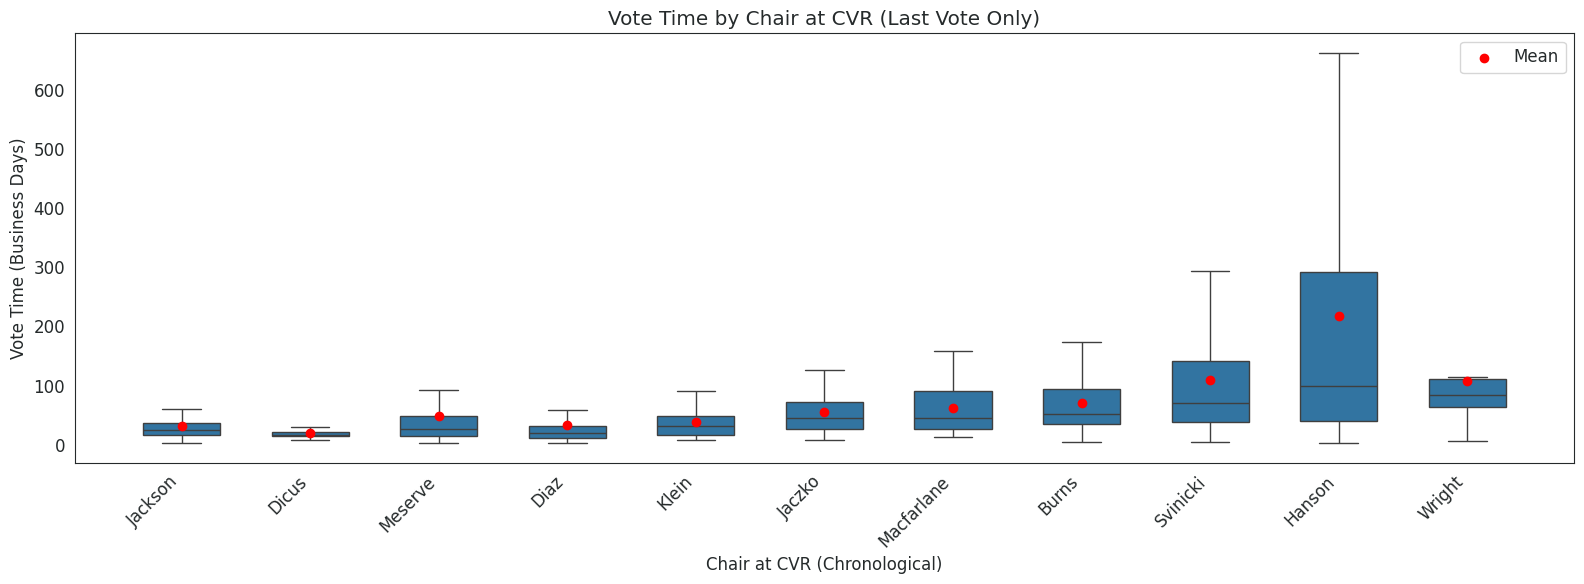

In [519]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Prepare data (one record per SECY: last vote only)
df = merged_with_timeline.loc[
    merged_with_timeline['last_vote'] == True,
    ['Chair at CVR', 'Vote Date', 'Vote_Business_Days']
].dropna()

# Ensure Vote Date is datetime
df['Vote Date'] = pd.to_datetime(df['Vote Date'], errors='coerce')

# Get chronological order of chairs by their first appearance
chair_order = (
    df.groupby('Chair at CVR')['Vote Date']
      .min()
      .sort_values()
      .index
)

print("Chair order earliest → latest:", list(chair_order))

# 2) Plot
plt.figure(figsize=(16, 6))
sns.boxplot(
    data=df,
    x='Chair at CVR',
    y='Vote_Business_Days',
    order=chair_order,   # chronological order
    showfliers=False,
    width=0.6
)

# Overlay red dots for the mean per chair
means = df.groupby('Chair at CVR')['Vote_Business_Days'].mean()
means = means.loc[chair_order]  # align with order
plt.scatter(
    x=range(len(means)),
    y=means.values,
    color='red',
    zorder=3,
    label='Mean'
)

plt.legend()
plt.xlabel('Chair at CVR (Chronological)')
plt.ylabel('Vote Time (Business Days)')
plt.title('Vote Time by Chair at CVR (Last Vote Only)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [520]:
df = merged_with_timeline.loc[
    merged_with_timeline['last_vote'] == True,
    ['Chair at CVR', 'SECY_number', 'Vote_Business_Days']
].dropna(subset=['Chair at CVR','SECY_number','Vote_Business_Days']).copy()

summary = (
    df.groupby('Chair at CVR')
      .agg(
          N=('Vote_Business_Days', 'count'),
          mean=('Vote_Business_Days', 'mean'),
          std=('Vote_Business_Days', 'std'),
          min=('Vote_Business_Days', 'min'),
          p25=('Vote_Business_Days', lambda x: x.quantile(0.25)),
          median=('Vote_Business_Days', lambda x: x.quantile(0.50)),
          p75=('Vote_Business_Days', lambda x: x.quantile(0.75)),
          p90=('Vote_Business_Days', lambda x: x.quantile(0.90)),
          p95=('Vote_Business_Days', lambda x: x.quantile(0.95)),
          max=('Vote_Business_Days', 'max'),
          SECY_numbers=('SECY_number', lambda s: ', '.join(sorted(s.astype(str).unique())))
      )
      .reindex(chair_order)
)

print(summary.round(2).to_string())

                N    mean     std   min    p25  median     p75    p90     p95     max                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [521]:
wright_all = df[df['Chair at CVR'].eq('Wright')].copy()

print("Wright N:", len(wright_all))

# show all columns you currently have
display(wright_all.sort_values('Vote_Business_Days', ascending=False))


Wright N: 14


,Chair at CVR,SECY_number,Vote_Business_Days
3381,Wright,SECY-24-0009,420.0
3400,Wright,SECY-24-0046,191.0
3408,Wright,SECY-24-0076,182.0
3267,Wright,SECY-22-0083,114.0
3182,Wright,SECY-21-0088,99.0
3367,Wright,SECY-23-0091,89.0
3405,Wright,SECY-24-0058,84.0
3433,Wright,SECY-25-0052,83.0
3430,Wright,SECY-25-0042,75.0
3418,Wright,SECY-24-0087,65.0


In [522]:
!wget -q https://github.com/rafael2k/ttf-mscorefonts/raw/main/fonts/Times%20New%20Roman.ttf -O /usr/share/fonts/truetype/TimesNewRoman.ttf
!fc-cache -fv >/dev/null
import matplotlib.font_manager as fm
fm._load_fontmanager(try_read_cache=False)
print(any("Times New Roman" in f.name for f in fm.fontManager.ttflist))

False


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Fonts found (subset): ['DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Display', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif']
Chosen serif family: Liberation Serif


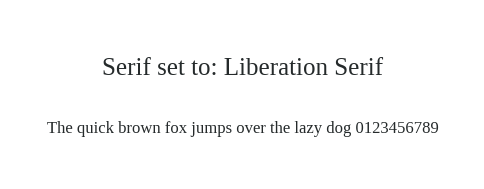

In [523]:
# --- Times-like serif setup (no restart, no EULA) ---
!apt-get update -qq
!apt-get install -y -qq fonts-texgyre fonts-liberation2 fontconfig >/dev/null
!fc-cache -fv >/dev/null

import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties

# Reload font manager to see newly installed fonts
fm._load_fontmanager(try_read_cache=False)

# Try to register specific files (helps when the name isn't yet in the cache)
candidates_paths = []
for root in ("/usr/share/fonts", "/usr/local/share/fonts"):
    for sub, _, files in os.walk(root):
        for f in files:
            lf = f.lower()
            if ("term" in lf and "texgyre" in lf and lf.endswith(".ttf")) or \
               ("liberationserif" in lf and lf.endswith(".ttf")):
                candidates_paths.append(os.path.join(sub, f))

for p in candidates_paths:
    try:
        fm.fontManager.addfont(p)
    except Exception:
        pass

# Build a list of available family names after registration
available_names = {f.name for f in fm.fontManager.ttflist}

# Preference order: real Times if somehow present, then Termes, then Liberation, then fallbacks
preference = [
    "Times New Roman",
    "TeX Gyre Termes",
    "Liberation Serif",
    "Nimbus Roman",
    "Times",
    "DejaVu Serif",
]

chosen = next((n for n in preference if n in available_names), "DejaVu Serif")

mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": [chosen] + [n for n in preference if n != chosen],
    "font.size": 12,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
})

print("Fonts found (subset):", sorted([n for n in available_names if any(k in n for k in ["Times","Termes","Liberation","Nimbus","DejaVu"])])[:10])
print("Chosen serif family:", chosen)

# Visual confirmation
plt.figure(figsize=(6, 2.2))
plt.text(0.5, 0.65, f"Serif set to: {chosen}", ha="center", va="center", fontsize=18)
plt.text(0.5, 0.30, "The quick brown fox jumps over the lazy dog 0123456789", ha="center", va="center")
plt.axis("off")
plt.show()


In [524]:
# --- Lock to the real Times New Roman you installed ---
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties

# paths where your TNR might be
_CANDIDATES = [
    "/usr/share/fonts/truetype/TimesNewRoman.ttf",        # your wget path
    "/usr/share/fonts/truetype/Times New Roman.ttf",      # alt name
    "/usr/local/share/fonts/truetype/tnr/Times New Roman.ttf",  # upload path
]

# find a TTF, add it, and get its true family name
chosen_family = None
for p in _CANDIDATES:
    if os.path.exists(p):
        try:
            fm.fontManager.addfont(p)  # register in-memory
            chosen_family = FontProperties(fname=p).get_name()
            break
        except Exception:
            pass

# refresh font list
fm._load_fontmanager(try_read_cache=False)

# fallbacks if not found
if not chosen_family:
    # if you also installed Termes, Matplotlib will see it here
    names = {f.name for f in fm.fontManager.ttflist}
    chosen_family = "TeX Gyre Termes" if "TeX Gyre Termes" in names else "DejaVu Serif"

# set AFTER seaborn themes (or before any plotting)
mpl.rcParams.update({
    "font.family": chosen_family,           # use the exact internal name
    "font.size": 12,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
})
print("Using font family:", chosen_family)


Using font family: DejaVu Serif


Font family in use: DejaVu Serif
Chair order earliest → latest: ['Jackson', 'Dicus', 'Meserve', 'Diaz', 'Klein', 'Jaczko', 'Macfarlane', 'Burns', 'Svinicki', 'Hanson', 'Wright']


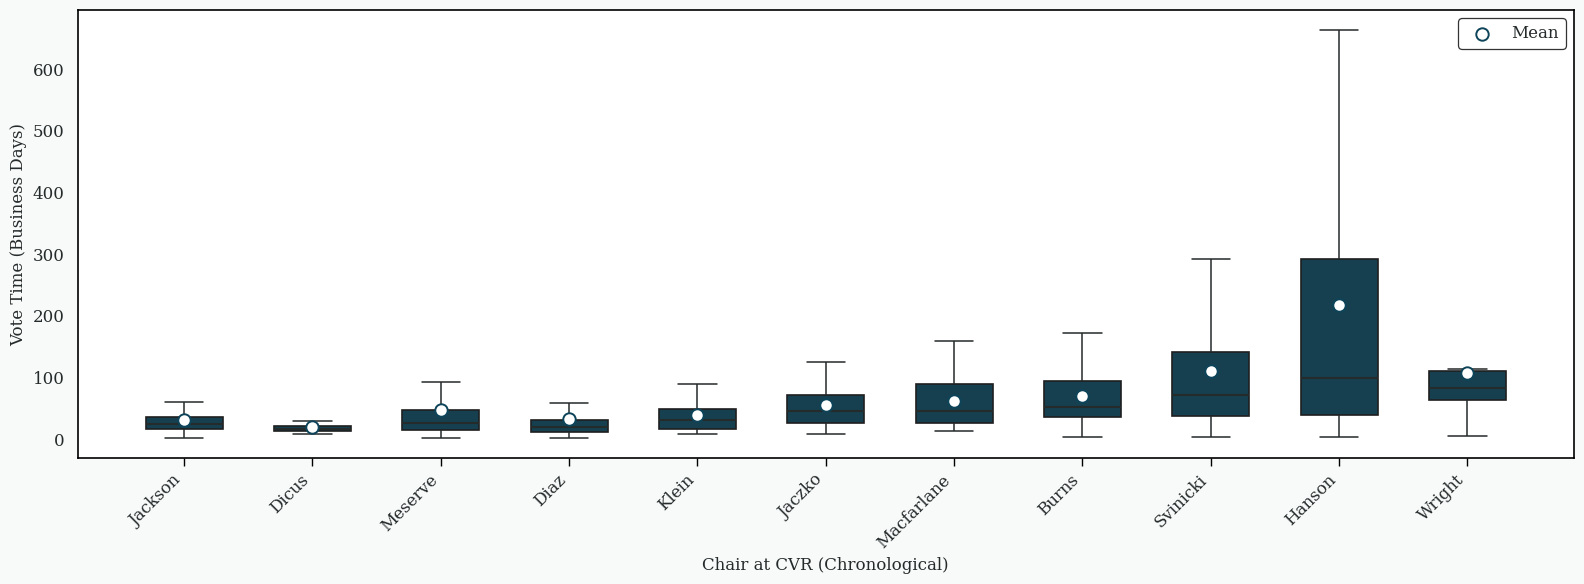

In [525]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os, subprocess

# -----------------------------
# Font setup: use uploaded "Times New Roman" if present
# -----------------------------
def pick_times_family():
    # Reload font list to include any fonts uploaded via files.upload() + addfont(...)
    fm._load_fontmanager(try_read_cache=False)
    names = {f.name for f in fm.fontManager.ttflist}

    # 1) Prefer the real thing (from your upload)
    if "Times New Roman" in names:
        return "Times New Roman"

    # 2) Try to ensure a Times-compatible clone if needed
    if "TeX Gyre Termes" not in names:
        try:
            subprocess.run(
                "apt-get update -qq && apt-get install -y -qq fonts-texgyre >/dev/null 2>&1",
                shell=True, check=False
            )
            subprocess.run("fc-cache -fv >/dev/null 2>&1", shell=True, check=False)
            fm._load_fontmanager(try_read_cache=False)
            names = {f.name for f in fm.fontManager.ttflist}
        except Exception:
            pass

    if "TeX Gyre Termes" in names:
        return "TeX Gyre Termes"

    # 3) Last resort
    return "DejaVu Serif"

# Apply seaborn first so our font settings stick
sns.set_style("white")

# Lock font family (string, not a list) so legend & ticks all match
chosen_family = pick_times_family()
mpl.rcParams.update({
    "font.family": chosen_family,   # exact family
    "font.size": 12,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
})

# -----------------------------
# Brand palette (your colors)
# -----------------------------
PALETTE = {
    "NAVY":   "#0D4459",  # primary accent (means, linework)
    "SKY":    "#56A9D5",  # box fill (screen) — still BW-safe with hatch
    "COAL":   "#252A2B",  # axes/labels/edges
    "PAPER":  "#F8F9F9",  # background
}

# -----------------------------
# 1) Prepare data (one record per SECY: last vote only)
# -----------------------------
df = merged_with_timeline.loc[
    merged_with_timeline['last_vote'] == True,
    ['Chair at CVR', 'Vote Date', 'Vote_Business_Days']
].dropna().copy()

# Ensure Vote Date is datetime
df['Vote Date'] = pd.to_datetime(df['Vote Date'], errors='coerce')

# Get chronological order of chairs by their first appearance
chair_order = (
    df.groupby('Chair at CVR')['Vote Date']
      .min()
      .sort_values()
      .index
      .tolist()
)
print("Font family in use:", chosen_family)
print("Chair order earliest → latest:", chair_order)

# -----------------------------
# 2) Plot (color-blind + B/W friendly)
# -----------------------------
plt.rcParams.update({
    'figure.facecolor': PALETTE["PAPER"],
    'savefig.facecolor': PALETTE["PAPER"],
    'axes.edgecolor': PALETTE["COAL"],
    'text.color': PALETTE["COAL"],
    'axes.labelcolor': PALETTE["COAL"],
    'xtick.color': PALETTE["COAL"],
    'ytick.color': PALETTE["COAL"],
})

fig, ax = plt.subplots(figsize=(16, 6))
fig.patch.set_facecolor(PALETTE["PAPER"])
ax.set_facecolor("white")

# Boxplot with single CB-safe color + hatching for B/W print
bp = sns.boxplot(
    data=df,
    x='Chair at CVR',
    y='Vote_Business_Days',
    order=chair_order,
    showfliers=False,
    width=0.6,
    color=PALETTE["NAVY"],
    linewidth=1.2,
    medianprops=dict(color=PALETTE["COAL"], linewidth=1.5),
    whiskerprops=dict(color=PALETTE["COAL"], linewidth=1.1),
    capprops=dict(color=PALETTE["COAL"], linewidth=1.1),
    ax=ax
)

# Add strong edges + hatch so it survives grayscale/photocopying
for patch in ax.artists:
    patch.set_edgecolor(PALETTE["COAL"])
    patch.set_facecolor(PALETTE["NAVY"])
    patch.set_hatch("///")

# Overlay mean per chair — place exactly at category centers
means = (
    df.groupby('Chair at CVR')['Vote_Business_Days']
      .mean()
      .reindex(chair_order)
)
centers = ax.get_xticks()
ax.scatter(
    x=centers,
    y=means.values,
    s=80,
    facecolors="white",
    edgecolors=PALETTE["NAVY"],
    linewidths=1.4,
    zorder=3,
    label='Mean'
)

# Clean styling
ax.grid(False)
leg = ax.legend(
    frameon=True,
    loc='upper right',
    prop={'family': chosen_family, 'size': 12}
)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(0.9)

ax.set_xlabel('Chair at CVR (Chronological)', color=PALETTE["COAL"])
ax.set_ylabel('Vote Time (Business Days)', color=PALETTE["COAL"])
plt.xticks(rotation=45, ha='right')

# Borders & ticks
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.2)
ax.tick_params(axis='x', direction='out', length=6, width=1, color='black', bottom=True, top=False)
ax.tick_params(axis='y', direction='out', length=6, width=1, color='black')

plt.tight_layout()
plt.show()


In [526]:
# Show records where Chair at CVR is Wright
wright_records = merged_with_timeline[
    merged_with_timeline['Chair at CVR'].str.upper() == "WRIGHT"
]

print(wright_records.shape)       # how many rows
print(wright_records.head(10))    # preview first 10 rows


(47, 62)
       SECY_number  \
3181  SECY-21-0088   
3182  SECY-21-0088   
3183  SECY-21-0088   
3266  SECY-22-0083   
3267  SECY-22-0083   
3345  SECY-23-0053   
3365  SECY-23-0091   
3367  SECY-23-0091   
3368  SECY-23-0091   
3377  SECY-24-0008   

                                                                                                                              SRM Description  \
3181  Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180)   
3182  Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180)   
3183  Denial of Petition Rulemaking on Alternative Method-for-Calculating Embrittlement for Steel Reactor Vessels (PRM-50-120; NRC-2019-0180)   
3266          Petition for Rulemaking and Rulemaking Plan on Public Protective Actions During a General Emergency (PRM-50-123; NRC-2020-0155)   
3267          Petition 

In [527]:
import pandas as pd
import statsmodels.formula.api as smf

# Step 1: Compute same_chair status at SECY level (True if all rows for the SECY have same Chair at SECY and Chair at CVR)
secy_chair_status = merged_with_timeline.groupby('SECY_number')['same_chair'].all().reset_index()
secy_chair_status = secy_chair_status.rename(columns={'same_chair': 'same_chair_all'})

# Step 2: Drop duplicates to have one row per SECY and get average Vote_Business_Days (or take last_vote if needed)
secy_level_df = merged_with_timeline[merged_with_timeline['last_vote'] == True]
secy_level_df = secy_level_df[['SECY_number', 'Vote_Business_Days']].dropna()

# Step 3: Merge the chair status with the SECY-level vote data
secy_level_df = pd.merge(secy_level_df, secy_chair_status, on='SECY_number', how='left')

# Step 4: Run regression using same_chair_all as the independent variable
model = smf.ols('Vote_Business_Days ~ C(same_chair_all)', data=secy_level_df).fit()

import statsmodels.api as sm
summary = model.summary()

# Count how many SECYs are True or False
chair_counts = secy_level_df['same_chair_all'].value_counts()

summary, chair_counts


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:     Vote_Business_Days   R-squared:                       0.206
 Model:                            OLS   Adj. R-squared:                  0.205
 Method:                 Least Squares   F-statistic:                     271.7
 Date:                Wed, 21 Jan 2026   Prob (F-statistic):           1.91e-54
 Time:                        20:37:30   Log-Likelihood:                -6240.6
 No. Observations:                1048   AIC:                         1.249e+04
 Df Residuals:                    1046   BIC:                         1.250e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------

In [528]:
##SECY vote
import pandas as pd
import statsmodels.formula.api as smf

# Ensure necessary columns are present and clean
regression_data = merged_with_timeline[['com_count_SECY', 'Vote_Business_Days']].dropna()


# Set 'commissioner_count' as categorical and order the levels with 5 as the base
regression_data['com_count_SECY'] = pd.Categorical(
    regression_data['com_count_SECY'],
    categories=[5, 4, 3],  # 5 is the baseline
    ordered=True
)

# Run regression using commissioner_count as a categorical predictor
model = smf.ols('Vote_Business_Days ~ C(com_count_SECY)', data=regression_data).fit()

# Show results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Vote_Business_Days   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     28.51
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           4.96e-13
Time:                        20:37:30   Log-Likelihood:                -25805.
No. Observations:                4422   AIC:                         5.162e+04
Df Residuals:                    4419   BIC:                         5.163e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 42

In [529]:
##CVR vote
import pandas as pd
import statsmodels.formula.api as smf

# Ensure necessary columns are present and clean
regression_data = merged_with_timeline[['com_count_CVR', 'Vote_Business_Days']].dropna()


# Set 'commissioner_count' as categorical and order the levels with 5 as the base
regression_data['com_count_CVR'] = pd.Categorical(
    regression_data['com_count_CVR'],
    categories=[5, 4, 3],  # 5 is the baseline
    ordered=True
)

# Run regression using commissioner_count as a categorical predictor
model = smf.ols('Vote_Business_Days ~ C(com_count_CVR)', data=regression_data).fit()

# Show results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Vote_Business_Days   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     19.06
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           5.73e-09
Time:                        20:37:30   Log-Likelihood:                -25814.
No. Observations:                4422   AIC:                         5.163e+04
Df Residuals:                    4419   BIC:                         5.165e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                41.22

In [530]:
import pandas as pd
import statsmodels.formula.api as smf

# Filter to only last votes
last_vote_data = merged_with_timeline[merged_with_timeline['last_vote'] == True]

# Ensure necessary columns are present and clean
regression_data = last_vote_data[['com_count_CVR', 'Vote_Business_Days']].dropna()

# Set 'com_count_CVR' as categorical with 5 as the base
regression_data['com_count_CVR'] = pd.Categorical(
    regression_data['com_count_CVR'],
    categories=[5, 4, 3],  # 5 is the reference level
    ordered=True
)

# Run regression
model = smf.ols('Vote_Business_Days ~ C(com_count_CVR)', data=regression_data).fit()

# Show results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Vote_Business_Days   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     9.481
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           8.31e-05
Time:                        20:37:30   Log-Likelihood:                -6352.2
No. Observations:                1048   AIC:                         1.271e+04
Df Residuals:                    1045   BIC:                         1.273e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                50.61

In [531]:
# Show rows with missing data in either column
dropped_records = last_vote_data[
    last_vote_data[['Chair at CVR', 'Vote_Business_Days']].isna().any(axis=1)
]

print(dropped_records.shape)     # how many rows were dropped
print(dropped_records.head(10))  # preview first 10 dropped rows


(1, 62)
       SECY_number  \
3347  SECY-23-0053   

                                                                                                                        SRM Description  \
3347  Denial of Petition for Rulemaking on Voluntary Adoption of Revised Design-Basis Accident Dose Criteria (PRM-50-121; NRC-202-0055)   

       SRM Date  SRM Year                                           SRM url  \
3347 2025-07-15      2023  https://www.nrc.gov/docs/ML2519/ML25196A456.html   

                                                                                                                            Description  \
3347  Denial of Petition for Rulemaking on Voluntary Adoption of Revised Design-Basis Accident Dose Criteria (PRM-50-121; NRC-202-0055)   

      SECY Date  SECY Year                                          SECY url  \
3347 2023-06-12       2023  https://www.nrc.gov/docs/ML2302/ML23026A052.html   

     detailed_type        _merge title    voter  Vote Date  CVR Year 

In [532]:
##completed under which chair, last vote
import pandas as pd
import statsmodels.formula.api as smf

# Filter to only last votes
last_vote_data = merged_with_timeline[merged_with_timeline['last_vote'] == True]

# Drop missing data
regression_data = last_vote_data[['Chair at CVR', 'Vote_Business_Days']].dropna()

# Treat Chair at CVR as categorical
regression_data['Chair at CVR'] = regression_data['Chair at CVR'].astype('category')

# Run regression
model = smf.ols('Vote_Business_Days ~ C(Q("Chair at CVR"))', data=regression_data).fit()

# Show results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Vote_Business_Days   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     32.91
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           9.41e-56
Time:                        20:37:30   Log-Likelihood:                -6211.5
No. Observations:                1047   AIC:                         1.244e+04
Df Residuals:                    1036   BIC:                         1.250e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [533]:
###without 2025 data

# Filter to only last votes
last_vote_data = merged_with_timeline[merged_with_timeline['last_vote'] == True].copy()

# Drop 2025
last_vote_data_2024 = last_vote_data[last_vote_data['SECY Year'] != 2025]  # adjust column name if needed

# Drop missing data
regression_data_2024 = last_vote_data_2024[['Chair at CVR', 'Vote_Business_Days']].dropna().copy()

# Treat Chair at CVR as categorical
regression_data_2024['Chair at CVR'] = regression_data_2024['Chair at CVR'].astype('category')

# Run regression
model = smf.ols('Vote_Business_Days ~ C(Q("Chair at CVR"))', data=regression_data_2024).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Vote_Business_Days   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     33.29
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           2.43e-56
Time:                        20:37:30   Log-Likelihood:                -6181.8
No. Observations:                1042   AIC:                         1.239e+04
Df Residuals:                    1031   BIC:                         1.244e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

#Table 1- build the final model - SECY level

In [534]:
##try everything
## dropped holiday_season, post-ostendorff, congress recess, fixed effect of voters, SECY before term
## did not include days served or term number because the results are contradictory and small
## removed    'Party_Presidency_Diff + Party_Congress_Diff ' and type because maybe significant but not explainning a lot of variance
import pandas as pd
import statsmodels.formula.api as smf

# Filter to one row per SECY (last vote)
secy_level = merged_with_timeline[merged_with_timeline['last_vote'] == True].copy()

# Categorize variables
secy_level['type'] = pd.Categorical(
    secy_level['type'],
    categories=['Other', 'Proposed Rule', 'Final Rule'],
    ordered=False
)

secy_level['com_count_CVR'] = pd.Categorical(secy_level['com_count_CVR'], categories=[5, 4, 3], ordered=True)
secy_level['same_chair'] = secy_level['same_chair'].astype(bool)
secy_level['post_Ostendorff'] = secy_level['post_Ostendorff'].astype(bool)
secy_level['holiday_season'] = secy_level['holiday_season'].astype(bool)
secy_level['congress_recess'] = secy_level['congress_recess'].astype(bool)

# OLS Regression — Full Model (Everything Included)
model = smf.ols(
    'Original_Vote_Business_Days ~ same_chair + C(com_count_average,Treatment(reference=5.0)) + C(Q("responsible_chair"), Treatment(reference="Klein"))',
    data=secy_level
).fit()

print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:     Original_Vote_Business_Days   R-squared:                       0.399
Model:                                     OLS   Adj. R-squared:                  0.390
Method:                          Least Squares   F-statistic:                     45.61
Date:                         Wed, 21 Jan 2026   Prob (F-statistic):          7.00e-103
Time:                                 20:37:30   Log-Likelihood:                -6322.0
No. Observations:                         1047   AIC:                         1.268e+04
Df Residuals:                             1031   BIC:                         1.276e+04
Df Model:                                   15                                         
Covariance Type:                     nonrobust                                         
                                                                            coef    std err          t      P>|t|      [

In [535]:
###baseline

# Exclude SECY-23-0053 from the dataset
baseline_data = secy_level[secy_level["SECY_number"] != "SECY-23-0053"]
# OLS Regression — Full Model (Everything Included)
model = smf.ols(
    'Original_Vote_Business_Days ~ same_chair + C(com_count_average,Treatment(reference=5.0))',
    data=baseline_data
).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Original_Vote_Business_Days   R-squared:                       0.256
Model:                                     OLS   Adj. R-squared:                  0.253
Method:                          Least Squares   F-statistic:                     71.70
Date:                         Wed, 21 Jan 2026   Prob (F-statistic):           1.50e-64
Time:                                 20:37:30   Log-Likelihood:                -6427.9
No. Observations:                         1047   AIC:                         1.287e+04
Df Residuals:                             1041   BIC:                         1.290e+04
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975

In [536]:
###baseline

# Exclude SECY-23-0053 from the dataset
baseline_data = secy_level[secy_level["SECY_number"] != "SECY-23-0053"]
# OLS Regression — Full Model (Everything Included)
model = smf.ols(
    'Original_Vote_Business_Days ~ same_chair ',
    data=baseline_data
).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Original_Vote_Business_Days   R-squared:                       0.233
Model:                                     OLS   Adj. R-squared:                  0.232
Method:                          Least Squares   F-statistic:                     316.9
Date:                         Wed, 21 Jan 2026   Prob (F-statistic):           3.98e-62
Time:                                 20:37:30   Log-Likelihood:                -6444.1
No. Observations:                         1047   AIC:                         1.289e+04
Df Residuals:                             1045   BIC:                         1.290e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

#Old Table 1- build the final model - SECY level

In [537]:
##try everything
## dropped holiday_season, post-ostendorff, congress recess, fixed effect of voters, SECY before term
## did not include days served or term number because the results are contradictory and small
## removed    'Party_Presidency_Diff + Party_Congress_Diff ' and type because maybe significant but not explainning a lot of variance
import pandas as pd
import statsmodels.formula.api as smf

# Filter to one row per SECY (last vote)
secy_level = merged_with_timeline[merged_with_timeline['last_vote'] == True].copy()

# Categorize variables
secy_level['type'] = pd.Categorical(
    secy_level['type'],
    categories=['Other', 'Proposed Rule', 'Final Rule'],
    ordered=False
)

secy_level['com_count_CVR'] = pd.Categorical(secy_level['com_count_CVR'], categories=[5, 4, 3], ordered=True)
secy_level['same_chair'] = secy_level['same_chair'].astype(bool)
secy_level['post_Ostendorff'] = secy_level['post_Ostendorff'].astype(bool)
secy_level['holiday_season'] = secy_level['holiday_season'].astype(bool)
secy_level['congress_recess'] = secy_level['congress_recess'].astype(bool)

# OLS Regression — Full Model (Everything Included)
model = smf.ols(
    'Original_Vote_Business_Days ~ same_chair + C(com_count_average,Treatment(reference=5.0)) + C(Q("Chair at CVR"), Treatment(reference="Klein"))',
    data=secy_level
).fit()

print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:     Original_Vote_Business_Days   R-squared:                       0.391
Model:                                     OLS   Adj. R-squared:                  0.382
Method:                          Least Squares   F-statistic:                     44.18
Date:                         Wed, 21 Jan 2026   Prob (F-statistic):          3.98e-100
Time:                                 20:37:30   Log-Likelihood:                -6322.9
No. Observations:                         1047   AIC:                         1.268e+04
Df Residuals:                             1031   BIC:                         1.276e+04
Df Model:                                   15                                         
Covariance Type:                     nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025

In [538]:
###baseline

# Exclude SECY-23-0053 from the dataset
baseline_data = secy_level[secy_level["SECY_number"] != "SECY-23-0053"]
# OLS Regression — Full Model (Everything Included)
model = smf.ols(
    'Vote_Business_Days ~ same_chair + C(com_count_average,Treatment(reference=5.0))',
    data=baseline_data
).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Vote_Business_Days   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     66.25
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           3.78e-60
Time:                        20:37:30   Log-Likelihood:                -6211.2
No. Observations:                1047   AIC:                         1.243e+04
Df Residuals:                    1041   BIC:                         1.246e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [539]:
###baseline

# Exclude SECY-23-0053 from the dataset
baseline_data = secy_level[secy_level["SECY_number"] != "SECY-23-0053"]
# OLS Regression — Full Model (Everything Included)
model = smf.ols(
    'Vote_Business_Days ~ same_chair ',
    data=baseline_data
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Vote_Business_Days   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     272.1
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           1.63e-54
Time:                        20:37:30   Log-Likelihood:                -6234.7
No. Observations:                1047   AIC:                         1.247e+04
Df Residuals:                    1045   BIC:                         1.248e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            208.8416      9

In [540]:
###baseline

# Exclude SECY-23-0053 from the dataset
baseline_data = secy_level[secy_level["SECY_number"] != "SECY-23-0053"]
# OLS Regression — Full Model (Everything Included)
model = smf.ols(
    'Vote_Business_Days ~ same_chair ',
    data=baseline_data
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Vote_Business_Days   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     272.1
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           1.63e-54
Time:                        20:37:30   Log-Likelihood:                -6234.7
No. Observations:                1047   AIC:                         1.247e+04
Df Residuals:                    1045   BIC:                         1.248e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            208.8416      9

In [541]:
secy_level_2024 = secy_level[secy_level['SECY Year'] != 2025]

# OLS Regression — Full Model (Everything Included)
model = smf.ols(
    'Vote_Business_Days ~ same_chair + C(com_count_average,Treatment(reference=5.0)) + C(Q("Chair at CVR"), Treatment(reference="Klein"))',
    data=secy_level_2024
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Vote_Business_Days   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     43.74
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           3.72e-99
Time:                        20:37:30   Log-Likelihood:                -6070.1
No. Observations:                1042   AIC:                         1.217e+04
Df Residuals:                    1026   BIC:                         1.225e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [542]:
import statsmodels.formula.api as smf

# 1) Remove the two SECYs
remove_secy = ['SECY-24-0009', 'SECY-24-0076']
secy_level_2024_filt = secy_level_2024[~secy_level_2024['SECY_number'].isin(remove_secy)].copy()

# 2) Prep regression data (same columns as before)
regression_data_2024_filt = secy_level_2024_filt[['Chair at CVR', 'Vote_Business_Days','com_count_average','same_chair']].dropna().copy()
regression_data_2024_filt['Chair at CVR'] = regression_data_2024_filt['Chair at CVR'].astype('category')

# 3) Run the regression (chair-only)
model = smf.ols('Vote_Business_Days ~ same_chair + C(com_count_average,Treatment(reference=5.0)) + C(Q("Chair at CVR"), Treatment(reference="Klein"))', data=regression_data_2024_filt).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Vote_Business_Days   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     43.10
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           7.40e-98
Time:                        20:37:30   Log-Likelihood:                -6055.6
No. Observations:                1040   AIC:                         1.214e+04
Df Residuals:                    1024   BIC:                         1.222e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [543]:
df.groupby('Chair at CVR').size().sort_values(ascending=False)
df[df['Chair at CVR'].eq('Wright')]['Vote_Business_Days'].describe([.5,.75,.9,.95,.99])


,Vote_Business_Days
count,14.000000
mean,107.642857
std,104.898931
min,6.000000
50%,83.500000
75%,110.250000
90%,188.300000
95%,271.150000
99%,390.230000
max,420.000000


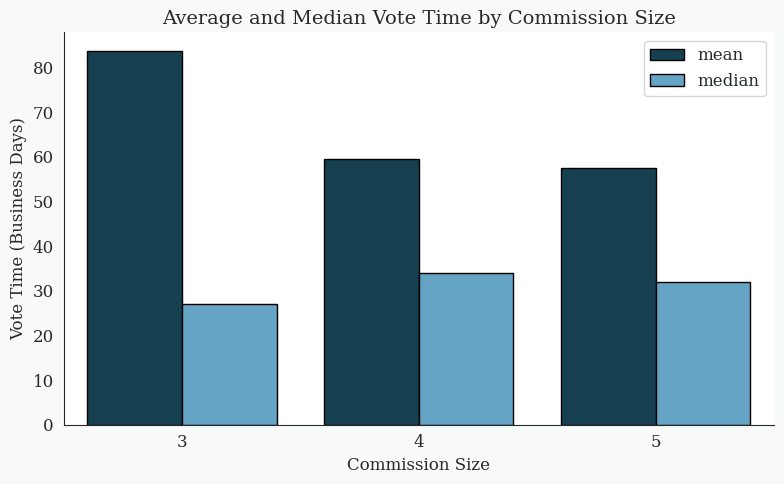

In [544]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your dataframe is called merged_with_timeline and has these columns:
# 'commissioner_count' (3, 4, or 5)
# 'Vote_Business_Days' (numeric)

df = merged_with_timeline.loc[
    merged_with_timeline['last_vote'] == True,
    ['com_count_SECY', 'Vote_Business_Days']
].dropna()

# Compute average and median
stats = (
    df.groupby('com_count_SECY')['Vote_Business_Days']
      .agg(['mean', 'median'])
      .reset_index()
      .rename(columns={'com_count_SECY': 'Commission Size'})
)

# Melt into long format for grouped plotting
stats_long = stats.melt(id_vars='Commission Size', var_name='Statistic', value_name='Days')

# --- Plot ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=stats_long,
    x='Commission Size', y='Days', hue='Statistic',
    palette=['#0D4459', '#56A9D5'],  # navy / sky from your palette
    edgecolor='black'
)

plt.title('Average and Median Vote Time by Commission Size', fontsize=14)
plt.xlabel('Commission Size', fontsize=12)
plt.ylabel('Vote Time (Business Days)', fontsize=12)
plt.legend(title='')
sns.despine()
plt.tight_layout()
plt.show()


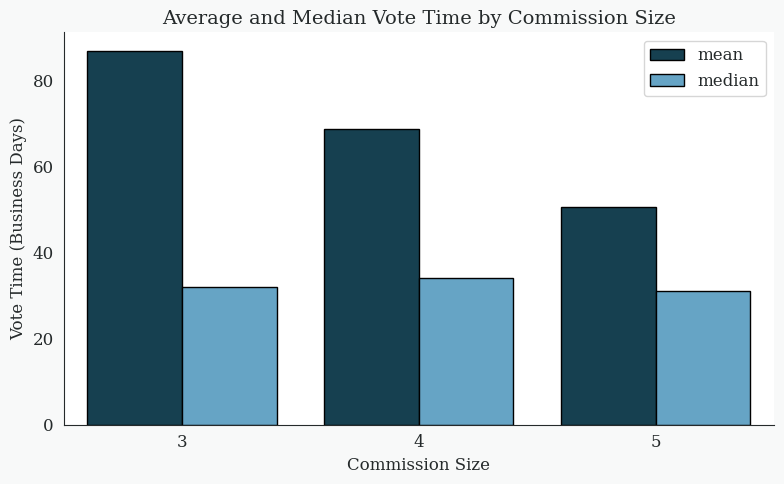

In [545]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your dataframe is called merged_with_timeline and has these columns:
# 'commissioner_count' (3, 4, or 5)
# 'Vote_Business_Days' (numeric)

df = merged_with_timeline.loc[
    merged_with_timeline['last_vote'] == True,
    ['com_count_CVR', 'Vote_Business_Days']
].dropna()

# Compute average and median
stats = (
    df.groupby('com_count_CVR')['Vote_Business_Days']
      .agg(['mean', 'median'])
      .reset_index()
      .rename(columns={'com_count_CVR': 'Commission Size'})
)

# Melt into long format for grouped plotting
stats_long = stats.melt(id_vars='Commission Size', var_name='Statistic', value_name='Days')

# --- Plot ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=stats_long,
    x='Commission Size', y='Days', hue='Statistic',
    palette=['#0D4459', '#56A9D5'],  # navy / sky from your palette
    edgecolor='black'
)

plt.title('Average and Median Vote Time by Commission Size', fontsize=14)
plt.xlabel('Commission Size', fontsize=12)
plt.ylabel('Vote Time (Business Days)', fontsize=12)
plt.legend(title='')
sns.despine()
plt.tight_layout()
plt.show()


/tmp/ipython-input-768244277.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


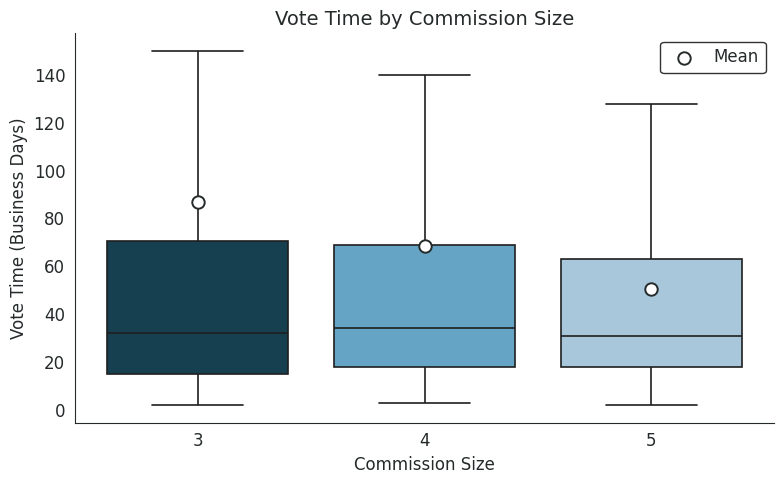

In [546]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Your brand colors ---
PALETTE = {
    "NAVY": "#0D4459",  # primary accent
    "SKY": "#56A9D5",   # secondary
    "COAL": "#252A2B",  # text + outlines
    "PAPER": "#FFFFFF"  # white background
}

# --- Matplotlib style setup ---
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 12,
    "figure.facecolor": PALETTE["PAPER"],
    "axes.facecolor": PALETTE["PAPER"],
    "savefig.facecolor": PALETTE["PAPER"],
    "axes.edgecolor": PALETTE["COAL"],
    "axes.labelcolor": PALETTE["COAL"],
    "text.color": PALETTE["COAL"],
    "xtick.color": PALETTE["COAL"],
    "ytick.color": PALETTE["COAL"]
})

# --- Data subset ---
df_box = merged_with_timeline.loc[
    merged_with_timeline['last_vote'] == True,
    ['com_count_CVR', 'Vote_Business_Days']
].dropna()

# --- Plot ---
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=df_box,
    x='com_count_CVR',
    y='Vote_Business_Days',
    palette=[PALETTE["NAVY"], PALETTE["SKY"], "#9FC9E3"],  # light progression for clarity
    showfliers=False,   # hide extreme outliers for clarity
    linewidth=1.2
)

# Overlay mean markers
means = (
    df_box.groupby('com_count_CVR')['Vote_Business_Days']
    .mean()
)
plt.scatter(
    x=range(len(means)),
    y=means.values,
    s=80,
    facecolors='white',
    edgecolors=PALETTE["COAL"],
    linewidths=1.4,
    zorder=3,
    label='Mean'
)

# --- Labels & legend ---
ax.set_xlabel("Commission Size", fontsize=12)
ax.set_ylabel("Vote Time (Business Days)", fontsize=12)
plt.title("Vote Time by Commission Size", fontsize=14)
plt.legend(frameon=True, loc='upper right', edgecolor='black')
sns.despine()

plt.tight_layout()
plt.show()


/tmp/ipython-input-1780867346.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


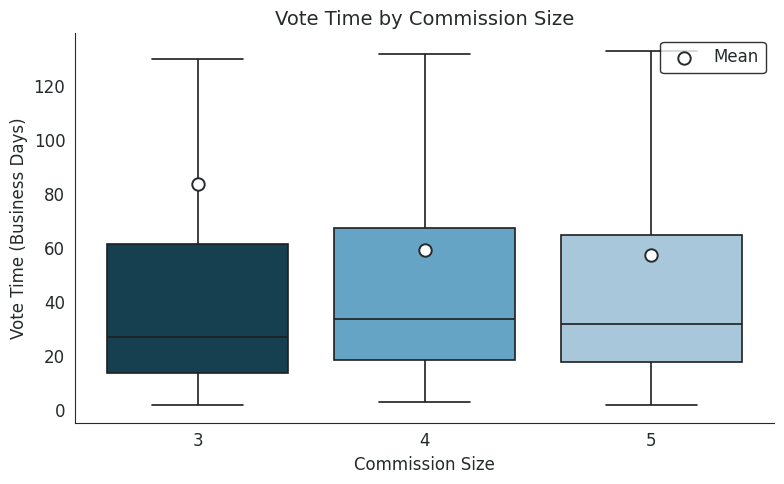

In [547]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Your brand colors ---
PALETTE = {
    "NAVY": "#0D4459",  # primary accent
    "SKY": "#56A9D5",   # secondary
    "COAL": "#252A2B",  # text + outlines
    "PAPER": "#FFFFFF"  # white background
}

# --- Matplotlib style setup ---
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 12,
    "figure.facecolor": PALETTE["PAPER"],
    "axes.facecolor": PALETTE["PAPER"],
    "savefig.facecolor": PALETTE["PAPER"],
    "axes.edgecolor": PALETTE["COAL"],
    "axes.labelcolor": PALETTE["COAL"],
    "text.color": PALETTE["COAL"],
    "xtick.color": PALETTE["COAL"],
    "ytick.color": PALETTE["COAL"]
})

# --- Data subset ---
df_box = merged_with_timeline.loc[
    merged_with_timeline['last_vote'] == True,
    ['com_count_SECY', 'Vote_Business_Days']
].dropna()

# --- Plot ---
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=df_box,
    x='com_count_SECY',
    y='Vote_Business_Days',
    palette=[PALETTE["NAVY"], PALETTE["SKY"], "#9FC9E3"],  # light progression for clarity
    showfliers=False,   # hide extreme outliers for clarity
    linewidth=1.2
)

# Overlay mean markers
means = (
    df_box.groupby('com_count_SECY')['Vote_Business_Days']
    .mean()
)
plt.scatter(
    x=range(len(means)),
    y=means.values,
    s=80,
    facecolors='white',
    edgecolors=PALETTE["COAL"],
    linewidths=1.4,
    zorder=3,
    label='Mean'
)

# --- Labels & legend ---
ax.set_xlabel("Commission Size", fontsize=12)
ax.set_ylabel("Vote Time (Business Days)", fontsize=12)
plt.title("Vote Time by Commission Size", fontsize=14)
plt.legend(frameon=True, loc='upper right', edgecolor='black')
sns.despine()

plt.tight_layout()
plt.show()


In [548]:


# OLS Regression — Full Model (Everything Included)
model = smf.ols(
    'Vote_Business_Days ~ same_chair + post_Ostendorff +C(com_count_average,Treatment(reference=5.0)) + C(Q("Chair at CVR") , Treatment(reference="Klein"))',
    data=secy_level
).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Vote_Business_Days   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     40.90
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           2.64e-98
Time:                        20:37:32   Log-Likelihood:                -6098.3
No. Observations:                1047   AIC:                         1.223e+04
Df Residuals:                    1030   BIC:                         1.231e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [549]:


# OLS Regression — Full Model (Everything Included)vote
model = smf.ols(
    'Vote_Business_Days ~ same_chair + post_Ostendorff +C(com_count_average,Treatment(reference=5.0)) + C(Q("voter") , Treatment(reference="KLEIN"))',
    data=secy_level
).fit()

print(model.summary())


PatsyError: specified level 'KLEIN' not found

In [ ]:
m_log = smf.ols('np.log1p(Vote_Business_Days) ~ same_chair + C(com_count_average, Treatment(5)) + post_Ostendorff + C(Q("Chair at CVR"))', data=secy_level).fit(cov_type="HC1")
print(m_log.summary())

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import NegativeBinomial

# design matrix: dummies + constant
X = pd.get_dummies(
    secy_level[['same_chair','post_Ostendorff','com_count_average','Chair at CVR']],
    drop_first=True
)

# make sure everything is numeric (no 'object' dtype), then add constant
X = X.apply(pd.to_numeric, errors='coerce').astype(float)
X = sm.add_constant(X, has_constant='add')

# dependent variable as non-negative integer
y = pd.to_numeric(secy_level['Vote_Business_Days'], errors='coerce').astype(int)

# align rows and drop any NaNs produced by coercion
keep = (~X.isna().any(axis=1)) & (~y.isna())
X = X.loc[keep]
y = y.loc[keep]

# Fit NB2 (estimates alpha automatically)
nb_mod = NegativeBinomial(y, X)
nb_res = nb_mod.fit(disp=False)   # set disp=True if you want iteration logs
print(nb_res.summary())
print("\nEstimated dispersion (alpha):", nb_res.params_alpha if hasattr(nb_res, 'params_alpha') else "see summary")


In [ ]:
##completed under which chair, all votes
import pandas as pd
import statsmodels.formula.api as smf

# Drop missing data
regression_data = merged_with_timeline[['Chair at CVR', 'Vote_Business_Days']].dropna()

# Treat Chair at CVR as categorical
regression_data['Chair at CVR'] = regression_data['Chair at CVR'].astype('category')

# Run regression
model = smf.ols('Vote_Business_Days ~ C(Q("Chair at CVR"))', data=regression_data).fit()

# Show results
print(model.summary())

In [ ]:
diff_chair_secys = merged_with_timeline[merged_with_timeline['same_chair'] == False]['SECY_number'].nunique()
print(f"Unique SECYs with different chair: {diff_chair_secys}")


In [ ]:
import statsmodels.formula.api as smf
import pandas as pd

# Filter and clean data
regression_data = merged_with_timeline[['same_chair', 'Vote_Business_Days']].dropna()

# Set True as the baseline
regression_data['same_chair'] = pd.Categorical(regression_data['same_chair'], categories=[True, False])

# Run regression
model = smf.ols('Vote_Business_Days ~ C(same_chair)', data=regression_data).fit()

# Show results
print(model.summary())


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Assuming your model formula is like this:
formula = 'Vote_Business_Days ~ same_chair+ C(com_count_average) + C(Q("Chair at CVR")) '

# Build design matrices
y, X = dmatrices(formula, data=secy_level, return_type='dataframe')

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


##Vote level model

In [ ]:
# Rename columns for syntax-friendly names
merged_with_timeline = merged_with_timeline.rename(columns={
    'Cumulative Days Served': 'Cumulative_Days_Served',
    'Term Number': 'Term_Number',
    'Role at SECY': 'Role_at_SECY',
    'Role at CVR': 'Role_at_CVR',
    'Chair at CVR': 'Chair_at_CVR',
    'Chair at SECY': 'Chair_at_SECY',
    'Party Affiliation': 'Party_Affiliation'
})



In [ ]:
model = smf.ols(
    '''Vote_Business_Days ~
C(same_chair, Treatment(reference=True))
+ C(voter, Treatment(reference="BARAN"))
+ C(Role_at_CVR, Treatment(reference="Chair"))
+ C(Role_at_SECY, Treatment(reference="Chair"))
+ C(com_count_average, Treatment(reference=5.0))
+ C(type, Treatment(reference="Other"))
+ C(Party_Affiliation)
+ Party_Congress_Diff + Party_Presidency_Diff
+ Cumulative_Days_Served + Term_Number
+ SECY_before_term + post_Ostendorff
''',
    data=merged_with_timeline
).fit()

print(model.summary())


In [ ]:

# Run model
model = smf.ols(
    '''
    Vote_Business_Days ~
    C(same_chair, Treatment(reference=True))
    + C(voter, Treatment(reference="BARAN"))
    + post_Ostendorff
    + C(com_count_average, Treatment(reference=5.0))
    + C(type, Treatment(reference="Other"))
    + Cumulative_Days_Served
    + Term_Number
    ''',
    data=merged_with_timeline
).fit()

print(model.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = model.model.exog
vif_df = pd.DataFrame({
    'Variable': model.model.exog_names,
    'VIF': [variance_inflation_factor(X, i) for i in range(X.shape[1])]
})
print(vif_df)


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Columns to use
cols = [
    'Vote_Business_Days', 'same_chair', 'Chair_at_CVR', 'com_count_average', 'type',
    'Party_Presidency_Diff', 'Party_Congress_Diff',
    'holiday_season', 'congress_recess', 'Gender',
    'Cumulative_Days_Served', 'Term_Number',
    'voter', 'post_Ostendorff', 'SECY_before_term'
]

# 1) Start from a DataFrame (copy the needed columns)
full_model_df = merged_with_timeline.loc[:, cols].copy()

# 2) Dtypes
# If these are already booleans (True/False or 0/1), this will be fine;
# if they are "True"/"False" strings, map them first.
bool_cols = ['same_chair','holiday_season','congress_recess','post_Ostendorff','SECY_before_term']
for c in bool_cols:
    if full_model_df[c].dtype == 'O':  # strings like "True"/"False"
        full_model_df[c] = full_model_df[c].map({'True': True, 'False': False, 1: True, 0: False})
    full_model_df[c] = full_model_df[c].astype(bool)

# Ordered categories for `type` (baseline = 'Other')
type_dtype = pd.api.types.CategoricalDtype(['Other', 'Proposed Rule', 'Final Rule'], ordered=True)
full_model_df['type'] = full_model_df['type'].astype(type_dtype)

# Treat com_count_average as categorical if it’s binned labels;
# if it’s numeric (e.g., counts), comment this line out to keep it numeric.
full_model_df['com_count_average'] = full_model_df['com_count_average'].astype('category')

# Gender/voter as categorical (strings are fine, but this is explicit)
full_model_df['Gender'] = full_model_df['Gender'].astype('category')
full_model_df['voter']  = full_model_df['voter'].astype('category')

# 3) Drop rows with missing values in model variables
full_model_df = full_model_df.dropna(subset=cols)

# 4) Fit OLS (use Q() for the column with a space)
model = smf.ols(
    formula=(
        'Vote_Business_Days ~ same_chair + C(type) + C(com_count_average) + '
        'C(Q("Chair_at_CVR")) + C(voter) + Party_Presidency_Diff + Party_Congress_Diff + '
        'holiday_season + congress_recess + C(Gender) + '
        'Cumulative_Days_Served + Term_Number + '
        'post_Ostendorff + SECY_before_term'
    ),
    data=full_model_df
).fit()

print(model.summary())


In [ ]:
import statsmodels.formula.api as smf


# Run the model including roles
model = smf.ols(
    'Vote_Business_Days ~ same_chair + C(type) + C(com_count_average) + C(Q("Chair_at_CVR")) + '
    'C(voter) + holiday_season + congress_recess + C(Gender) + post_Ostendorff + '
    'SECY_before_term +  Party_Congress_Diff + '
    'Cumulative_Days_Served + Term_Number ',
    data=merged_with_timeline
).fit()

print(model.summary())


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Reconstruct the design matrix from your latest model formula (without Party_Presidency_Diff)
formula = """Vote_Business_Days ~ same_chair + C(type) + C(com_count_average) +
             C(Q("Chair_at_CVR")) + C(voter) + holiday_season + congress_recess +
             C(Gender) + post_Ostendorff + SECY_before_term + Party_Congress_Diff +
             Cumulative_Days_Served + Term_Number"""

# Generate design matrices
y, X = dmatrices(formula, merged_with_timeline, return_type='dataframe')

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

In [ ]:
merged_with_timeline['post_Ostendorff'] = merged_with_timeline['SECY Date'] >= '2016-06-30'
# First, convert 'voter' to categorical
model = smf.ols(
    'Vote_Business_Days ~ C(same_chair, Treatment(reference=True)) + C(voter, Treatment(reference="BARAN")) + post_Ostendorff + C(com_count_average, Treatment(reference=5.0)) + C(type, Treatment(reference="Other")) + Term_Number',
    data=merged_with_timeline
).fit()


print(model.summary())


In [ ]:
# Check data types before VIF
print(X.dtypes)

# Convert all columns explicitly to float
X = X.astype(float)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Prepare your model matrix (X) with all predictors as dummies
X = pd.get_dummies(
    merged_with_timeline[[
        'same_chair', 'voter', 'post_Ostendorff', 'com_count_average',
        'type', 'Role_at_SECY', 'Role_at_CVR'
    ]],
    drop_first=True
)

# Add numeric predictors
X['Cumulative_Days_Served'] = merged_with_timeline['Cumulative_Days_Served']
X['Term_Number'] = merged_with_timeline['Term_Number']

# Ensure all columns are numeric (very important)
X = X.astype(float)

# Add constant term
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_df = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_df.sort_values(by='VIF', ascending=False)


In [ ]:
model = smf.ols(
    'Vote_Business_Days ~ post_Ostendorff + same_chair + C(com_count_average)  + C(type) + C(Q("Chair_at_CVR"))',
    data=merged_with_timeline
).fit()


print(model.summary())


In [ ]:
merged_with_timeline[['Cumulative_Days_Served', 'Term_Number']].corr()


In [ ]:
!pip install ruptures
import ruptures as rpt

# Sort data by vote date and extract the time series
sorted_df = merged_with_timeline.sort_values('Vote Date')
signal = sorted_df['Vote_Business_Days'].dropna().values

# Run change point detection (e.g., Pelt for mean shifts)
algo = rpt.Pelt(model="l2").fit(signal)
breaks = algo.predict(pen=10)

# Visualize
rpt.display(signal, breaks)


#Analysis after Figure 2

In [ ]:
import numpy as np

sorted_df = merged_with_timeline.sort_values('SECY Date')

results = []
dates = sorted_df['SECY Date'].dropna().unique()

for date in dates:
    df = sorted_df.copy()
    df['cutoff_dummy'] = df['SECY Date'] >= date
    model = smf.ols('Original_Vote_Business_Days ~ cutoff_dummy', data=df).fit()
    results.append((date, model.rsquared_adj, model.aic))

# Convert to DataFrame and find the optimal cutoff
cutoff_eval = pd.DataFrame(results, columns=['date', 'adj_r2', 'aic'])
best_cutoff = cutoff_eval.sort_values(by='aic').iloc[0]
print(best_cutoff)


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Sort and drop missing SECY dates
sorted_df = merged_with_timeline.sort_values('SECY Date').dropna(subset=['SECY Date'])

# Prepare a list to store results
results = []

# Loop over unique SECY dates as potential cutoff points
for date in sorted_df['SECY Date'].unique():
    df = sorted_df.copy()
    df['cutoff_dummy'] = df['SECY Date'] >= date  # Create dummy for cutoff
    model = smf.ols('Vote_Business_Days ~ cutoff_dummy', data=df).fit()
    results.append((date, model.rsquared_adj, model.aic))

# Convert results to DataFrame
cutoff_eval = pd.DataFrame(results, columns=['date', 'adj_r2', 'aic'])

# Find the date with the best adjusted R² (highest value)
best_cutoff = cutoff_eval.loc[cutoff_eval['adj_r2'].idxmax()]

# Print best cutoff date
print("Best cutoff date based on highest Adjusted R²:")
print(best_cutoff)


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Subset and drop missing values
regression_data = merged_with_timeline[[
    'com_count_average', 'Vote_Business_Days', 'consistency_count'
]].dropna()

# Ensure commissioner count is categorical with proper baseline
regression_data['com_count_average'] = pd.Categorical(
    regression_data['com_count_average'],
    categories=[5, 4.5, 4, 3.5, 3],  # 5 is the reference
    ordered=True
)

# Run the regression with both predictors
model = smf.ols(
    'Vote_Business_Days ~ C(com_count_average) + consistency_count',
    data=regression_data
).fit()

# Print summary
print(model.summary())


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Subset and drop missing values
regression_data = merged_with_timeline[[
    'com_count_average', 'Vote_Business_Days', 'consistency_count', 'voter'
]].dropna()

# Ensure commissioner count is categorical with proper baseline
regression_data['com_count_average'] = pd.Categorical(
    regression_data['com_count_average'],
    categories=[5, 4.5, 4, 3.5, 3],  # 5 is the reference
    ordered=True
)

model = smf.ols(
    'Vote_Business_Days ~ C(com_count_average) + consistency_count + C(voter)',
    data=regression_data
).fit()

# Print summary
print(model.summary())


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Subset and drop missing values
regression_data = merged_with_timeline[[
    'com_count_average', 'Vote_Business_Days', 'consistency_count', 'voter', 'SECY Year'
]].dropna()

regression_data = regression_data.rename(columns={'SECY Year': 'SECY_Year'})

# Ensure commissioner count is categorical with proper baseline
regression_data['com_count_average'] = pd.Categorical(
    regression_data['com_count_average'],
    categories=[5, 4.5, 4, 3.5, 3],  # 5 is the reference
    ordered=True
)

model = smf.ols(
    'Vote_Business_Days ~ C(com_count_average) + consistency_count +  C(SECY_Year)',
    data=regression_data
).fit()

# Print summary
print(model.summary())




In [ ]:
# First, ensure 'SECY_Year' is numeric and drop missing
merged_with_timeline['SECY Year'] = pd.to_numeric(merged_with_timeline['SECY Year'], errors='coerce')
merged_with_timeline = merged_with_timeline.dropna(subset=['SECY Year'])

# Count how many SECYs per year
secys_per_year = merged_with_timeline.groupby('SECY Year').size().reset_index(name='secy_count')

# Merge this back into the regression data
regression_data = regression_data.merge(secys_per_year, left_on='SECY_Year', right_on='SECY Year', how='left')
regression_data = regression_data.drop(columns='SECY Year')

# Now re-run the regression with secy_count added as a regressor
model_with_secy_count = smf.ols(
    'Vote_Business_Days ~ C(com_count_average) + consistency_count + C(voter) + C(SECY_Year) + secy_count',
    data=regression_data
).fit()

# Show model summary

model_with_secy_count.summary()


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Subset and drop missing values
regression_data = merged_with_timeline[[
    'com_count_average', 'Vote_Business_Days', 'consistency_count', 'voter', 'SECY Year', 'detailed_type'
]].dropna()

regression_data = regression_data.rename(columns={'SECY Year': 'SECY_Year'})

# Ensure commissioner count is categorical with proper baseline
regression_data['com_count_average'] = pd.Categorical(
    regression_data['com_count_average'],
    categories=[5, 4.5, 4, 3.5, 3],  # 5 is the reference
    ordered=True
)

model = smf.ols(
    'Vote_Business_Days ~ C(com_count_average) + consistency_count + C(voter) + C(SECY_Year) + C(detailed_type)',
    data=regression_data
).fit()

# Print summary
print(model.summary())




In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Subset and drop missing values
regression_data = merged_with_timeline[[
    'com_count_average', 'Vote_Business_Days', 'consistency_count', 'voter', 'SECY Year', 'detailed_type'
]].dropna()

regression_data = regression_data.rename(columns={'SECY Year': 'SECY_Year'})

# Ensure commissioner count is categorical with proper baseline
regression_data['com_count_average'] = pd.Categorical(
    regression_data['com_count_average'],
    categories=[5, 4.5, 4, 3.5, 3],  # 5 is the reference
    ordered=True
)


# Fit the model with interaction between com_count_average and consistency_count
interaction_model = smf.ols(
    'Vote_Business_Days ~ C(com_count_average) * consistency_count + C(voter) + C(SECY_Year)',
    data=regression_data
).fit()

# Show the summary
interaction_model.summary()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Use the same formula (excluding the dependent variable)
y, X = dmatrices('Vote_Business_Days ~ C(com_count_average) + consistency_count + C(voter) + C(SECY_Year)',
                 data=regression_data, return_type='dataframe')

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values("VIF", ascending=False)


In [ ]:
##include detailed type
import statsmodels.formula.api as smf

# Create a working copy of the data
regression_data = merged_with_timeline[['Vote_Business_Days', 'com_count_consistent', 'detailed_type']].dropna()

# Ensure com_count_consistent is categorical with an ordered baseline
regression_data['com_count_consistent'] = pd.Categorical(
    regression_data['com_count_consistent'],
    categories=[5, 4, 3],
    ordered=True
)

# Fit regression model including detailed_type
model = smf.ols('Vote_Business_Days ~ C(com_count_consistent) + C(detailed_type)', data=regression_data).fit()

model.summary()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure column exists
if 'com_count_consistent' in merged_with_timeline.columns:
    # Group by commissioner count and calculate average and median Vote_Business_Days
    commissioner_summary = merged_with_timeline.groupby('com_count_consistent').agg(
        avg_vote_days=('Vote_Business_Days', 'mean'),
        med_vote_days=('Vote_Business_Days', 'median')
    ).reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    x = range(len(commissioner_summary))

    plt.bar([i - bar_width/2 for i in x], commissioner_summary['avg_vote_days'], width=bar_width,
            label='Average SRM Days', color='skyblue')
    plt.bar([i + bar_width/2 for i in x], commissioner_summary['med_vote_days'], width=bar_width,
            label='Median SRM Days', color='lightgreen')

    plt.xticks(ticks=x, labels=commissioner_summary['com_count_consistent'])
    plt.xlabel('Consistent Commissioner Count')
    plt.ylabel('Business Days')
    plt.title('Average and Median SRM Time by Consistent Commissioner Count')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("The column 'com_count_consistent' does not exist in the dataset.")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure column exists
if 'com_count_consistent' in merged_with_timeline.columns:
    # Group by commissioner count and calculate average and median Vote_Business_Days
    commissioner_summary = merged_with_timeline.groupby('com_count_consistent').agg(
        avg_vote_days=('SRM_Business_Days', 'mean'),
        med_vote_days=('SRM_Business_Days', 'median')
    ).reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    x = range(len(commissioner_summary))

    plt.bar([i - bar_width/2 for i in x], commissioner_summary['avg_vote_days'], width=bar_width,
            label='Average Vote Days', color='skyblue')
    plt.bar([i + bar_width/2 for i in x], commissioner_summary['med_vote_days'], width=bar_width,
            label='Median Vote Days', color='lightgreen')

    plt.xticks(ticks=x, labels=commissioner_summary['com_count_consistent'])
    plt.xlabel('Consistent Commissioner Count')
    plt.ylabel('Business Days')
    plt.title('Average and Median Vote Time by Consistent Commissioner Count')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("The column 'com_count_consistent' does not exist in the dataset.")


In [ ]:

import pandas as pd
import statsmodels.formula.api as smf

# Ensure necessary columns are present and clean
regression_data = merged_with_timeline[['com_count_consistent', 'SRM_Business_Days']].dropna()


# Set 'commissioner_count' as categorical and order the levels with 5 as the base
regression_data['com_count_consistent'] = pd.Categorical(
    regression_data['com_count_consistent'],
    categories=[5, 4, 3],  # 5 is the baseline
    ordered=True
)

# Run regression using commissioner_count as a categorical predictor
model = smf.ols('SRM_Business_Days ~ C(com_count_consistent)', data=regression_data).fit()

# Show results
print(model.summary())


In [ ]:
import scipy.stats as stats

# Filter valid commissioner count records with non-null vote days
valid_data = merged_with_timeline[
    merged_with_timeline['com_count_consistent'].isin([3, 4, 5]) &
    merged_with_timeline['Vote_Business_Days'].notna()
]

# Create groups
group_3 = valid_data[valid_data['com_count_consistent'] == 3]['Vote_Business_Days']
group_4 = valid_data[valid_data['com_count_consistent'] == 4]['Vote_Business_Days']
group_5 = valid_data[valid_data['com_count_consistent'] == 5]['Vote_Business_Days']

# Run ANOVA
anova_result = stats.f_oneway(group_3, group_4, group_5)
anova_result


In [ ]:
## original regression
##Try SRM business days
import pandas as pd
import statsmodels.formula.api as smf

# Ensure necessary columns are present and clean
regression_data = merged_with_timeline[['com_count_SECY', 'SRM_Business_Days']].dropna()

# Set 'commissioner_count' as categorical and order the levels with 5 as the base
regression_data['com_count_SECY'] = pd.Categorical(
    regression_data['com_count_SECY'],
    categories=[5, 4, 3],  # 5 is the baseline
    ordered=True
)

# Run regression using commissioner_count as a categorical predictor
model = smf.ols('SRM_Business_Days ~ C(com_count_SECY)', data=regression_data).fit()

# Show results
print(model.summary())

In [ ]:
## original regression
##vote business days
import pandas as pd
import statsmodels.formula.api as smf

# Ensure necessary columns are present and clean
regression_data = merged_with_timeline[['com_count_SECY', 'Vote_Business_Days']].dropna()

# Set 'commissioner_count' as categorical and order the levels with 5 as the base
regression_data['com_count_SECY'] = pd.Categorical(
    regression_data['com_count_SECY'],
    categories=[5, 4, 3],  # 5 is the baseline
    ordered=True
)

# Run regression using commissioner_count as a categorical predictor
model = smf.ols('Vote_Business_Days ~ C(com_count_SECY)', data=regression_data).fit()

# Show results
print(model.summary())

In [ ]:
##by CVR date
##vote business days
import pandas as pd
import statsmodels.formula.api as smf

# Ensure necessary columns are present and clean
regression_data = merged_with_timeline[['com_count_CVR', 'Vote_Business_Days']].dropna()

# Set 'commissioner_count' as categorical and order the levels with 5 as the base
regression_data['com_count_CVR'] = pd.Categorical(
    regression_data['com_count_CVR'],
    categories=[5, 4, 3],  # 5 is the baseline
    ordered=True
)

# Run regression using commissioner_count as a categorical predictor
model = smf.ols('Vote_Business_Days ~ C(com_count_CVR)', data=regression_data).fit()

# Show results
print(model.summary())

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Step 1: Filter for only the last vote per SECY
last_votes = merged_with_timeline[merged_with_timeline['last_vote'] == True].copy()

# Step 2: Keep only necessary columns and drop missing values
regression_data = last_votes[['com_count_CVR', 'Vote_Business_Days']].dropna()

# Step 3: Set com_count_CVR as categorical with 5 as the baseline
regression_data['com_count_CVR'] = pd.Categorical(
    regression_data['com_count_CVR'],
    categories=[5, 4, 3],  # 5 is the base (omitted category)
    ordered=True
)

# Step 4: Run OLS regression
model = smf.ols('Vote_Business_Days ~ C(com_count_CVR)', data=regression_data).fit()

# Step 5: Display summary
print(model.summary())


In [ ]:
import statsmodels.formula.api as smf
import pandas as pd

# Rename column to avoid space
regression_data = merged_with_timeline[['com_count_consistent', 'Vote_Business_Days', 'SECY Year']].dropna()
regression_data = regression_data.rename(columns={'SECY Year': 'SECY_Year'})

# Ensure correct types
regression_data['com_count_consistent'] = pd.Categorical(regression_data['com_count_consistent'], categories=[5, 4, 3], ordered=True)
regression_data['SECY_Year'] = regression_data['SECY_Year'].astype(int).astype('category')

# Run regression
model = smf.ols('Vote_Business_Days ~ C(com_count_consistent) + C(SECY_Year)', data=regression_data).fit()

# Show results
print(model.summary())


In [ ]:
##original and vote and voter fixed effect
##fixed effect of commissioners
import pandas as pd
import statsmodels.formula.api as smf

# Prepare the data
regression_data = merged_with_timeline[['com_count_SECY', 'Vote_Business_Days', 'voter']].dropna()

# Set 'com_count_consistent' as ordered categorical
regression_data['com_count_SECY'] = pd.Categorical(
    regression_data['com_count_SECY'],
    categories=[5, 4, 3],
    ordered=True
)

# Run OLS with fixed effects for voters (treated as categorical)
model_with_fixed_effects = smf.ols('Vote_Business_Days ~ C(com_count_SECY) + C(voter)', data=regression_data).fit()
model_with_fixed_effects.summary()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os

regression_data = merged_with_timeline[['com_count_SECY', 'Original_Vote_Business_Days', 'voter']].dropna()

# Prepare the data for the model
features = ['com_count_average', 'consistency_count', 'Party_Presidency_Diff', 'Party_Congress_Diff', 'Cumulative Days Served', 'Term Number']
target = 'Vote_Business_Days'

# Rename columns to be syntax-friendly
merged_with_timeline = merged_with_timeline.rename(columns={
    'Cumulative Days Served': 'Cumulative_Days_Served',
    'Term Number': 'Term_Number'
})
features = ['com_count_average', 'consistency_count', 'Party_Presidency_Diff', 'Party_Congress_Diff', 'Cumulative_Days_Served', 'Term_Number']


# Create a new DataFrame with the selected features and target
data = merged_with_timeline[features + [target]].dropna()

# Convert categorical features to dummy variables
data = pd.get_dummies(data, columns=['com_count_average'], drop_first=True)

# Split the data into training and testing sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Build and train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Vote Business Days")
plt.ylabel("Predicted Vote Business Days")
plt.title("Gradient Boosting Regressor: Actual vs. Predicted")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- your feature/target setup ---
merged_tmp = merged_with_timeline.rename(columns={
    'Cumulative Days Served': 'Cumulative_Days_Served',
    'Term Number': 'Term_Number'
}).copy()

features = [
    'com_count_average', 'consistency_count', 'Party_Presidency_Diff',
    'Party_Congress_Diff', 'Cumulative_Days_Served', 'Term_Number'
]
target = 'Original_Vote_Business_Days'

data = merged_tmp[features + [target]].dropna().copy()
data = pd.get_dummies(data, columns=['com_count_average'], drop_first=True)

X = data.drop(columns=[target])
y = data[target].astype(float)

# --- same split as you used (note: test_size=0.7 means 70% test) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- metrics ---
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

gbrt_fit_table = pd.DataFrame({
    "GBRT metric": ["Observations (train)", "Observations (test)", "MSE", "RMSE", "MAE", "R-squared"],
    "Value": [len(y_train), len(y_test), mse, rmse, mae, r2]
})

# formatting (optional)
gbrt_fit_table["Value"] = gbrt_fit_table["Value"].apply(lambda v: f"{v:.2f}" if isinstance(v, (int, float, np.floating)) else v)

gbrt_fit_table


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

# =========================
# 0) Rename columns (SECY-level safe names)
# =========================
mwt = merged_with_timeline.rename(columns={
    'Cumulative Days Served': 'Cumulative_Days_Served',
    'Term Number': 'Term_Number'
}).copy()

# =========================
# 1) SECY-level collapse (1 row per SECY_number)
#    - outcome = SECY-level vote time (Original_Vote_Business_Days)
#    - predictors = SECY-level covariates (take first / mean as appropriate)
# =========================
features = [
    'com_count_average',
    'consistency_count',
    'Party_Presidency_Diff',
    'Party_Congress_Diff',
    'Cumulative_Days_Served',
    'Term_Number'
]
target = 'Original_Vote_Business_Days'   # <-- SECY-level DV

# If your SECY id column is named differently, change here:
secy_id = 'SECY_number'

# Collapse to one row per SECY_number
secy_level = (
    mwt[[secy_id] + features + [target]]
    .dropna(subset=[secy_id, target])
    .groupby(secy_id, as_index=False)
    .agg({
        target: 'first',
        'com_count_average': lambda s: s.dropna().iloc[0] if s.notna().any() else np.nan,
        'consistency_count': 'first',
        'Party_Presidency_Diff': 'first',
        'Party_Congress_Diff': 'first',
        'Cumulative_Days_Served': 'first',
        'Term_Number': 'first'
    })
)

# Drop rows missing any predictors you want to use
secy_level = secy_level.dropna(subset=features + [target]).copy()

# =========================
# 2) Dummies for categorical predictor(s)
# =========================
data = pd.get_dummies(secy_level[features + [target]], columns=['com_count_average'], drop_first=True)

X = data.drop(columns=[target])
y = data[target].astype(float)

# =========================
# 3) Train/test split (more standard: 70% train / 30% test)
#    If you truly want 70% test, set test_size=0.7
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# =========================
# 4) Fit GBRT
# =========================
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# =========================
# 5) Metrics + "Panel B" table
# =========================
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

gbrt_fit_table = pd.DataFrame({
    "GBRT metric": ["Observations (train)", "Observations (test)", "MSE", "RMSE", "MAE", "R-squared"],
    "Value": [len(y_train), len(y_test), mse, rmse, mae, r2]
})

# pretty formatting for pasting into Panel B
gbrt_fit_table["Value"] = gbrt_fit_table["Value"].apply(
    lambda v: f"{v:,.2f}" if isinstance(v, (int, float, np.floating)) else v
)

print("Gradient Boosting Regressor (SECY-level) Model Evaluation:")
display(gbrt_fit_table)

# =========================
# 6) Plot: Actual vs Predicted
# =========================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual SECY vote time (business days)")
plt.ylabel("Predicted SECY vote time (business days)")
plt.title("GBRT (SECY-level): Actual vs. Predicted")
plt.tight_layout()
plt.show()


In [ ]:
# Install pygam if not already installed
!pip install -q pygam

import numpy as np
import pandas as pd
from pygam import LinearGAM, s
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -----------------------------
# 1. Prepare the data
# -----------------------------
features = [
    'com_count_average',
    'consistency_count',
    'Party_Presidency_Diff',
    'Party_Congress_Diff',
    'Cumulative_Days_Served',
    'Term_Number'
]
target = 'Original_Vote_Business_Days'

data = merged_with_timeline[features + [target]].dropna()

# Convert categorical features to dummy variables if needed
data = pd.get_dummies(data, columns=['com_count_average'], drop_first=True)

X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -----------------------------
# 2. Build and train the GAM model
# -----------------------------
# Option 1: Let LinearGAM create one spline per column automatically
gam = LinearGAM()  # Will automatically create s(0), s(1), ..., s(n-1)
gam.fit(X_train, y_train)

# -----------------------------
# 3. Make predictions
# -----------------------------
y_pred = gam.predict(X_test)

# -----------------------------
# 4. Evaluate the model
# -----------------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("GAM Model Summary:")
print(gam.summary())
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# -----------------------------
# 5. Plot actual vs predicted
# -----------------------------
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Vote Business Days")
plt.ylabel("Predicted Vote Business Days")
plt.title("GAM Model: Actual vs. Predicted")
plt.show()


In [ ]:
import statsmodels.formula.api as smf

# Prepare the data for the model
# Using the same features as before
features = ['com_count_average', 'consistency_count', 'Party_Presidency_Diff', 'Party_Congress_Diff', 'Cumulative_Days_Served', 'Term_Number']
target = 'Vote_Business_Days'

# Create a new DataFrame with the selected features and target
regression_data = merged_with_timeline[features + [target]].dropna()

# Build and fit the OLS model
# Use C() to treat com_count_average as a categorical variable
formula = 'Vote_Business_Days ~ C(com_count_average) + consistency_count + Party_Presidency_Diff + Party_Congress_Diff + Cumulative_Days_Served + Term_Number'

model = smf.ols(formula, data=regression_data).fit()

# Print the model summary
print(model.summary())


## Vote level

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os

# Corrected file paths
drive_path = '/content/drive/Shareddrives/Nuclear/Projects/2025/NRC Commission vote efficiency/data/'
input_path = os.path.join(drive_path, 'merged_with_allterm.csv')
timeline_path = os.path.join(drive_path, 'NRC_timeline.xlsx')
political_path = os.path.join(drive_path, 'political_data.xlsx')


# Check if files exist before loading
if not os.path.exists(input_path):
    print(f"Error: File not found at {input_path}")
elif not os.path.exists(timeline_path):
    print(f"Error: File not found at {timeline_path}")
elif not os.path.exists(political_path):
    print(f"Error: File not found at {political_path}")
else:
    # Load the data
    merged_cleaned = pd.read_csv(input_path)
    nrc_timeline_data = pd.read_excel(timeline_path)
    political_data = pd.read_excel(political_path)

    # Ensure all date columns are in datetime format
    date_cols = ['SECY Date', 'Vote Date', 'SRM Date']
    for col in date_cols:
        merged_cleaned[col] = pd.to_datetime(merged_cleaned[col], errors='coerce')

    # Merge with timeline data
    nrc_timeline_data['date'] = pd.to_datetime(nrc_timeline_data['date'])
    merged_with_timeline = merged_cleaned.merge(
        nrc_timeline_data,
        left_on='SECY Date',
        right_on='date',
        how='left'
    )
    merged_with_timeline = merged_with_timeline.drop(columns=['date'])
    merged_with_timeline = merged_with_timeline.rename(columns={'commissioner_count': 'com_count_SECY'})
    merged_with_timeline = merged_with_timeline.merge(
        nrc_timeline_data,
        left_on='Vote Date',
        right_on='date',
        how='left'
    )
    merged_with_timeline = merged_with_timeline.drop(columns=['date'])
    merged_with_timeline = merged_with_timeline.rename(columns={'commissioner_count': 'com_count_CVR'})
    merged_with_timeline = merged_with_timeline.merge(
        nrc_timeline_data,
        left_on='SRM Date',
        right_on='date',
        how='left'
    )
    merged_with_timeline = merged_with_timeline.drop(columns=['date'])
    merged_with_timeline = merged_with_timeline.rename(columns={'commissioner_count': 'com_count_SRM'})
    merged_with_timeline['com_count_average'] = (merged_with_timeline['com_count_SECY']+merged_with_timeline['com_count_CVR'])/2
    merged_with_timeline['consistency_count'] = np.where(merged_with_timeline['com_count_SECY'] == merged_with_timeline['com_count_CVR'], 1, 0)


    # Merge with political data
    political_data['Date'] = pd.to_datetime(political_data['Date'], errors='coerce')
    merged_with_timeline = merged_with_timeline.merge(
        political_data,
        left_on='Vote Date',
        right_on='Date',
        how='left'
    )

    # Feature Engineering
    merged_with_timeline['Party'] = merged_with_timeline['Party Affiliation'].map({
        'Democrat': 0,
        'Republican': 1,
        'Independent':0.5
    })
    merged_with_timeline['Party_Congress_Diff'] = (merged_with_timeline['Party'] - merged_with_timeline['Congress']).abs()
    merged_with_timeline['Party_Presidency_Diff'] = (merged_with_timeline['Party'] - merged_with_timeline['Presidency']).abs()

    # Select all available columns except the target and identifiers
    all_features = merged_with_timeline.columns.tolist()
    irrelevant_cols = ['SECY_number', 'SRM Description', 'SRM url', 'Description', 'SECY url',
                       '_merge', 'title', 'Vote Date', 'CVR Year', 'valid_vote_date',
                       '_merge_CVR', 'availability', 'SRM_Business_Days', 'Vote_SRM_Business_Days',
                       'first_vote', 'last_vote', 'Role at CVR', 'Party Affiliation', 'Start Date',
                       'End Date', 'Gender', 'Chair at CVR', 'Cumulative Days Served', 'Term Number',
                       'Last Name', 'Date_x', 'matched', 'Role at SECY', 'Chair at SECY',
                       'SECY_before_term', 'Original_Vote_Business_Days', 'Original_SRM_Business_Days',
                       'com_count_SECY', 'com_count_CVR', 'com_count_SRM', 'type', 'Date_y',
                       'Congress', 'Presidency', 'Party', 'com_count_consistent'] # Exclude target and identifiers/duplicates

    features = [col for col in all_features if col not in irrelevant_cols and col != 'Vote_Business_Days']


    # Create a new DataFrame with the selected features and target
    data = merged_with_timeline[features + ['Vote_Business_Days']].dropna()

    # Identify categorical and numerical features
    categorical_features = ['voter', 'detailed_type'] # Add other categorical features if necessary
    numerical_features = [col for col in features if col not in categorical_features]

    # Convert categorical features to dummy variables
    data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

    # Drop date columns from features
    data = data.drop(columns=['SRM Date', 'SECY Date'])


    # Split the data into training and testing sets
    X = data.drop('Vote_Business_Days', axis=1)
    y = data['Vote_Business_Days']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Build and train the Gradient Boosting Regressor model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Gradient Boosting Regressor Model Evaluation:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel("Actual Vote Business Days")
    plt.ylabel("Predicted Vote Business Days")
    plt.title("Gradient Boosting Regressor: Actual vs. Predicted")
    plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)


# Print the best hyperparameters and the corresponding R-squared score
print("Best hyperparameters found: ", grid_search.best_params_)
print("Best R-squared score: ", grid_search.best_score_)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Create a new Gradient Boosting Regressor model with the best hyperparameters
best_model = GradientBoostingRegressor(random_state=42, **best_params)

# Re-train the model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Tuned Gradient Boosting Regressor Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Vote Business Days")
plt.ylabel("Predicted Vote Business Days")
plt.title("Tuned Gradient Boosting Regressor: Actual vs. Predicted")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['OLS', 'GBoost', 'GAM']
train_r2 = [0.35, 0.82, 0.55]
test_r2 = [0.33, 0.39, 0.11]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, train_r2, width, label='Train R²')
plt.bar(x + width/2, test_r2, width, label='Test R²')
plt.xticks(x, models)
plt.ylabel("R²")
plt.title("Train vs Test R² by Model")
plt.legend()
plt.show()


In [ ]:
##graph the data versus various model curves overlay take a look at the fit
##split linear between pre- and post baran is going to be descriptor something changed there
# 34% R^2 there
##graph the machine learning approach - whether that changes anything
## most impactful the variance and time increased dramatically at some time, not easily descirbed with a model at all, multiple factors, there maybe a variable that we are not accounting for a characteristic of the date, maybe about SECY itself
## a hidden variable a voting process allows for both approval and disapproval (votes allow this so the factor is meaningless) they usually do both to. SRM - just follow the words not the vote


## corelation matrix (none of them are significantly correlated) to the variance of time to vote (second order effect) does that also correlate to the sudden changes in the voting time

## party: not helping to explain variance but significant (just collinear)

##changes in voting timeline per commissioner over time (Wright getting more or less efficient?) group by commissioner and bounding line graphs for each a seperate line graph for each commisioner
## try both years of secy and years of vote

## both approval and deny
## Secretary of Commission
